## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.impute import KNNImputer


## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = '/kaggle/input/diabetes-readmission-prediction-i43/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df

The shape of the dataset is (71236, 50).




encounter_id  patient_nbr       race  gender      age weight  \
0         197920182    110382426  Caucasian  Female  [80-90)      ?   
1          30870324      1276911  Caucasian    Male  [70-80)      ?   
2         126616944     92115693  Caucasian  Female  [70-80)      ?   
3         303646118     32010471  Caucasian    Male  [50-60)      ?   
4         109444026      2402271  Caucasian    Male  [40-50)      ?   
...             ...          ...        ...     ...      ...    ...   
71231     242809818     39060180  Caucasian    Male  [40-50)      ?   
71232     406694150     43796898  Caucasian    Male  [70-80)      ?   
71233      83519910     15749334  Caucasian    Male  [60-70)      ?   
71234     227511798     67898304  Caucasian  Female  [60-70)      ?   
71235     148433280     43720650  Caucasian    Male  [70-80)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      3                         1                    7   
1                      3                         5                    1   
2                      3                         3                    1   
3                      6                         1                    7   
4                      1                         1                    6   
...                  ...                       ...                  ...   
71231                  1                         2                    7   
71232                  3                         1                    1   
71233                  1                         1                    7   
71234                  1                         1                    7   
71235                  3                         1                    1   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                     5  ...          No      No                   No   
1                     3  ...          No      No                   No   
2                     8  ...          No      Up                   No   
3                     7  ...          No      No                   No   
4                     2  ...          No  Steady                   No   
...                 ...  ...         ...     ...                  ...   
71231                 1  ...          No  Steady                   No   
71232                 2  ...          No      No                   No   
71233                 3  ...          No  Steady                   No   
71234                 1  ...          No      No                   No   
71235                 4  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                       No                        No                       No   
1                       No                        No                       No   
2                       No                        No                       No   
3                       No                        No                       No   
4                       No                        No                       No   
...                    ...                       ...                      ...   
71231                   No                        No                       No   
71232                   No                        No                       No   
71233                   No                        No                       No   
71234                   No                        No                       No   
71235                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
0                          No      Ch         Yes        >30  
1                          No      No         Yes         NO  
2                          No      Ch         Yes         NO  
3                          No      No          No        >30  
4                          No      No         Yes         NO  
...                      

In [3]:
df.sort_values('patient_nbr',inplace=True)

In [4]:
df

encounter_id  patient_nbr             race  gender      age weight  \
13297      24437208          135        Caucasian  Female  [50-60)      ?   
28013      26264286          135        Caucasian  Female  [50-60)      ?   
8762      189899286          729        Caucasian  Female  [80-90)      ?   
49106      64331490          774        Caucasian  Female  [80-90)      ?   
67980      14824206          927  AfricanAmerican  Female  [30-40)      ?   
...             ...          ...              ...     ...      ...    ...   
3499      356074790    189195422            Asian  Female  [70-80)      ?   
26076     345521498    189215762        Caucasian    Male  [40-50)      ?   
42408     346048298    189298877            Other  Female  [60-70)      ?   
5446      359725880    189349430            Asian  Female  [70-80)      ?   
50465     418513058    189351095        Caucasian  Female  [80-90)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
13297                  2                         1                    1   
28013                  1                         1                    7   
8762                   1                         3                    7   
49106                  1                         1                    7   
67980                  1                         1                    7   
...                  ...                       ...                  ...   
3499                   1                         1                    7   
26076                  1                         6                    7   
42408                  1                         1                    7   
5446                   1                         1                    7   
50465                  1                         1                    7   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
13297                 8  ...          No  Steady                   No   
28013                 3  ...          No      No                   No   
8762                  4  ...          No      No                   No   
49106                 3  ...          No      No                   No   
67980                 5  ...          No      No                   No   
...                 ...  ...         ...     ...                  ...   
3499                  5  ...          No      Up                   No   
26076                 5  ...          No      Up                   No   
42408                 1  ...          No    Down                   No   
5446                  1  ...          No      No                   No   
50465                 1  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
13297                   No                        No                       No   
28013                   No                        No                       No   
8762                    No                        No                       No   
49106                   No                        No                       No   
67980                   No                        No                       No   
...                    ...                       ...                      ...   
3499                    No                        No                       No   
26076                   No                        No                       No   
42408                   No                        No                       No   
5446                    No                        No                       No   
50465                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
13297                      No      Ch         Yes        <30  
28013                      No      Ch         Yes        >30  
8762                       No      No         Yes         NO  
49106                      No      Ch         Yes         NO  
67980           

In [5]:
df.sort_index()

encounter_id  patient_nbr       race  gender      age weight  \
0         197920182    110382426  Caucasian  Female  [80-90)      ?   
1          30870324      1276911  Caucasian    Male  [70-80)      ?   
2         126616944     92115693  Caucasian  Female  [70-80)      ?   
3         303646118     32010471  Caucasian    Male  [50-60)      ?   
4         109444026      2402271  Caucasian    Male  [40-50)      ?   
...             ...          ...        ...     ...      ...    ...   
71231     242809818     39060180  Caucasian    Male  [40-50)      ?   
71232     406694150     43796898  Caucasian    Male  [70-80)      ?   
71233      83519910     15749334  Caucasian    Male  [60-70)      ?   
71234     227511798     67898304  Caucasian  Female  [60-70)      ?   
71235     148433280     43720650  Caucasian    Male  [70-80)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      3                         1                    7   
1                      3                         5                    1   
2                      3                         3                    1   
3                      6                         1                    7   
4                      1                         1                    6   
...                  ...                       ...                  ...   
71231                  1                         2                    7   
71232                  3                         1                    1   
71233                  1                         1                    7   
71234                  1                         1                    7   
71235                  3                         1                    1   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                     5  ...          No      No                   No   
1                     3  ...          No      No                   No   
2                     8  ...          No      Up                   No   
3                     7  ...          No      No                   No   
4                     2  ...          No  Steady                   No   
...                 ...  ...         ...     ...                  ...   
71231                 1  ...          No  Steady                   No   
71232                 2  ...          No      No                   No   
71233                 3  ...          No  Steady                   No   
71234                 1  ...          No      No                   No   
71235                 4  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                       No                        No                       No   
1                       No                        No                       No   
2                       No                        No                       No   
3                       No                        No                       No   
4                       No                        No                       No   
...                    ...                       ...                      ...   
71231                   No                        No                       No   
71232                   No                        No                       No   
71233                   No                        No                       No   
71234                   No                        No                       No   
71235                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
0                          No      Ch         Yes        >30  
1                          No      No         Yes         NO  
2                          No      Ch         Yes         NO  
3                          No      No          No        >30  
4                          No      No         Yes         NO  
...                      

In [6]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... examide citoglipton  insulin  glyburide-metformin  \
0                 4  ...      No          No   Steady                   No   
1                 3  ...      No          No   Steady                   No   
2                 4  ...      No          No       No                   No   
3                 7  ...      No          No   Steady                   No   
4                 7  ...      No          No       No                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone change diabetesMed  
0                      No     No         Yes  
1                      No     Ch         Yes  
2                      No     No          No  
3                      No     No         Yes  
4                      No     No         Yes  

[5 rows x 49 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71236 entries, 13297 to 50465
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71236 non-null  int64 
 1   patient_nbr               71236 non-null  int64 
 2   race                      71236 non-null  object
 3   gender                    71236 non-null  object
 4   age                       71236 non-null  object
 5   weight                    71236 non-null  object
 6   admission_type_id         71236 non-null  int64 
 7   discharge_disposition_id  71236 non-null  int64 
 8   admission_source_id       71236 non-null  int64 
 9   time_in_hospital          71236 non-null  int64 
 10  payer_code                71236 non-null  object
 11  medical_specialty         71236 non-null  object
 12  num_lab_procedures        71236 non-null  int64 
 13  num_procedures            71236 non-null  int64 
 14  num_medications   

In [8]:
df.isnull().sum().sum()

0

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]

In [10]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

encounter_id: Number of unique values 71236
patient_nbr: Number of unique values 54085
race: Number of unique values 6
gender: Number of unique values 3
age: Number of unique values 10
weight: Number of unique values 10
admission_type_id: Number of unique values 8
discharge_disposition_id: Number of unique values 26
admission_source_id: Number of unique values 16
time_in_hospital: Number of unique values 14
payer_code: Number of unique values 18
medical_specialty: Number of unique values 71
num_lab_procedures: Number of unique values 112
num_procedures: Number of unique values 7
num_medications: Number of unique values 75
number_outpatient: Number of unique values 35
number_emergency: Number of unique values 28
number_inpatient: Number of unique values 21
diag_1: Number of unique values 684
diag_2: Number of unique values 701
diag_3: Number of unique values 750
number_diagnoses: Number of unique values 16
max_glu_serum: Number of unique values 4
A1Cresult: Number of unique values 4
met

In [12]:
numeric_columns = list(df.select_dtypes(include='number').columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [13]:
df[numeric_columns].describe()

encounter_id   patient_nbr  admission_type_id  \
count  7.123600e+04  7.123600e+04       71236.000000   
mean   1.651251e+08  5.424765e+07           2.024679   
std    1.028815e+08  3.873555e+07           1.446816   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.475544e+07  2.340903e+07           1.000000   
50%    1.524368e+08  4.515530e+07           1.000000   
75%    2.303751e+08  8.740911e+07           3.000000   
max    4.438672e+08  1.893511e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              71236.000000         71236.000000      71236.000000   
mean                   3.709824             5.763420          4.397861   
std                    5.267355             4.076464          2.982953   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    3.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count        71236.000000    71236.000000     71236.000000       71236.000000   
mean            43.099570        1.337315        16.017014           0.367553   
std             19.655114        1.705764         8.102990           1.244195   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          40.000000   

       number_emergency  number_inpatient  number_diagnoses  
count      71236.000000      71236.000000      71236.000000  
mean           0.195645          0.632124          7.418974  
std            0.899766          1.252125          1.931462  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [14]:
df[categorical_columns].describe()

race  gender      age weight payer_code medical_specialty diag_1  \
count       71236   71236    71236  71236      71236             71236  71236   
unique          6       3       10     10         18                71    684   
top     Caucasian  Female  [70-80)      ?          ?                 ?    428   
freq        53269   38298    18277  69027      28218             34987   4825   

       diag_2 diag_3 max_glu_serum  ... citoglipton insulin  \
count   71236  71236         71236  ...       71236   71236   
unique    701    750             4  ...           1       4   
top       428    250          None  ...          No      No   
freq     4704   8158         67452  ...       71236   33123   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count                71236               71236                    71236   
unique                   4                   2                        2   
top                     No                  No                       No   
freq                 70720               71227                    71235   

       metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
count                    71236                  71236  71236       71236   
unique                       2                      2      2           2   
top                         No                     No     No         Yes   
freq                     71235                  71235  38359       54994   

       readmitted  
count       71236  
unique          3  
top            NO  
freq        38405  

[4 rows x 37 columns]

In [15]:
for column in df[categorical_columns]:
    print(f"{column}: Number of values \n{df[column].value_counts()}")
    print("==========================================================")

race: Number of values 
Caucasian          53269
AfricanAmerican    13445
?                   1592
Hispanic            1427
Other               1054
Asian                449
Name: race, dtype: int64
gender: Number of values 
Female             38298
Male               32937
Unknown/Invalid        1
Name: gender, dtype: int64
age: Number of values 
[70-80)     18277
[60-70)     15662
[50-60)     12125
[80-90)     12048
[40-50)      6763
[30-40)      2659
[90-100)     1941
[20-30)      1165
[10-20)       479
[0-10)        117
Name: age, dtype: int64
weight: Number of values 
?            69027
[75-100)       933
[50-75)        603
[100-125)      435
[125-150)      105
[25-50)         64
[0-25)          31
[150-175)       28
[175-200)        9
>200             1
Name: weight, dtype: int64
payer_code: Number of values 
?     28218
MC    22647
HM     4380
SP     3522
BC     3302
MD     2469
CP     1765
UN     1729
CM     1328
OG      720
PO      410
DM      388
CH      101
WC       97
OT   

In [16]:
for column in df[numeric_columns]:
    print(f"{column}: Number of values \n{df[column].value_counts()}")
    print("==========================================================")

encounter_id: Number of values 
24437208     1
117235704    1
199608642    1
174887952    1
124377462    1
            ..
143999208    1
35485602     1
36377958     1
152820948    1
418513058    1
Name: encounter_id, Length: 71236, dtype: int64
patient_nbr: Number of values 
88785891     25
43140906     21
84428613     17
24011577     17
1660293      17
             ..
32915277      1
32917347      1
32919858      1
32921811      1
189351095     1
Name: patient_nbr, Length: 54085, dtype: int64
admission_type_id: Number of values 
1    37822
3    13163
2    12907
6     3690
5     3411
8      224
7       14
4        5
Name: admission_type_id, dtype: int64
discharge_disposition_id: Number of values 
1     42164
3      9820
6      9025
18     2600
2      1466
22     1405
11     1147
5       829
25      667
4       566
7       427
13      274
23      274
14      263
28       99
8        80
15       44
24       33
9        17
17       12
16        7
10        6
27        4
19        4
12    

In [17]:
df_org=df

In [18]:
df.groupby(['gender'])['readmitted'].value_counts()

gender           readmitted
Female           NO            20328
                 >30           13663
                 <30            4307
Male             NO            18076
                 >30           11218
                 <30            3643
Unknown/Invalid  NO                1
Name: readmitted, dtype: int64

In [19]:
cop_drop=df[df['gender']=='Unknown/Invalid'].index
df.drop(cop_drop,inplace=True)


In [20]:
cop_drop

Int64Index([6239], dtype='int64')

In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df.iloc[cop_drop]

encounter_id  patient_nbr             race  gender      age weight  \
6239       4404996      3344895  AfricanAmerican  Female  [70-80)      ?   

      admission_type_id  discharge_disposition_id  admission_source_id  \
6239                  6                        25                    1   

      time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
6239                 1  ...          No      No                   No   

      glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
6239                   No                        No                       No   

      metformin-pioglitazone  change diabetesMed readmitted  
6239                      No      No          No        >30  

[1 rows x 50 columns]

In [23]:
df.shape

(71235, 50)

In [24]:
df['medical_specialty'].unique()

array(['Cardiology', 'Surgery-Cardiovascular/Thoracic',
       'InternalMedicine', 'Hematology/Oncology', '?',
       'Orthopedics-Reconstructive', 'Surgery-General',
       'Emergency/Trauma', 'Family/GeneralPractice', 'Pulmonology',
       'Psychiatry', 'Endocrinology', 'Surgery-Neuro', 'Nephrology',
       'PhysicalMedicineandRehabilitation', 'Pediatrics-CriticalCare',
       'Urology', 'Radiology', 'ObstetricsandGynecology',
       'Pediatrics-Pulmonology', 'Gastroenterology', 'Orthopedics',
       'Psychology', 'Gynecology', 'Anesthesiology', 'Pediatrics',
       'PhysicianNotFound', 'Pediatrics-Endocrinology', 'Podiatry',
       'Pediatrics-Neurology', 'Surgery-Colon&Rectal',
       'Pediatrics-AllergyandImmunology', 'Anesthesiology-Pediatric',
       'Neurology', 'Pediatrics-InfectiousDiseases',
       'Obsterics&Gynecology-GynecologicOnco', 'Otolaryngology',
       'Pediatrics-Hematology-Oncology', 'Pediatrics-EmergencyMedicine',
       'InfectiousDiseases', 'Psychiatry-Child/A

In [25]:
df_n=[df,test_df]
df2 = pd.concat(df_n)
df2

encounter_id  patient_nbr             race  gender      age weight  \
0          24437208          135        Caucasian  Female  [50-60)      ?   
1          26264286          135        Caucasian  Female  [50-60)      ?   
2         189899286          729        Caucasian  Female  [80-90)      ?   
3          64331490          774        Caucasian  Female  [80-90)      ?   
4          14824206          927  AfricanAmerican  Female  [30-40)      ?   
...             ...          ...              ...     ...      ...    ...   
30525     160817292     81392220        Caucasian    Male  [70-80)      ?   
30526     296022602     58097331  AfricanAmerican    Male  [50-60)      ?   
30527     156232536    102965040        Caucasian  Female  [60-70)      ?   
30528     407964242     45700785        Caucasian  Female  [40-50)      ?   
30529     110113794      6286986        Caucasian  Female  [50-60)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      2                         1                    1   
1                      1                         1                    7   
2                      1                         3                    7   
3                      1                         1                    7   
4                      1                         1                    7   
...                  ...                       ...                  ...   
30525                  2                         6                    1   
30526                  1                        13                    7   
30527                  2                         1                    2   
30528                  1                         6                    7   
30529                  2                         1                    1   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                     8  ...          No  Steady                   No   
1                     3  ...          No      No                   No   
2                     4  ...          No      No                   No   
3                     3  ...          No      No                   No   
4                     5  ...          No      No                   No   
...                 ...  ...         ...     ...                  ...   
30525                 8  ...          No    Down                   No   
30526                 5  ...          No      No                   No   
30527                 4  ...          No    Down                   No   
30528                12  ...          No  Steady                   No   
30529                 3  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                       No                        No                       No   
1                       No                        No                       No   
2                       No                        No                       No   
3                       No                        No                       No   
4                       No                        No                       No   
...                    ...                       ...                      ...   
30525                   No                        No                       No   
30526                   No                        No                       No   
30527                   No                        No                       No   
30528                   No                        No                       No   
30529                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
0                          No      Ch         Yes        <30  
1                          No      Ch         Yes        >30  
2                          No      No         Yes         NO  
3                          No      Ch         Yes         NO  
4               

In [26]:
df2['visit_counts'] = df2['patient_nbr'].map(df2['patient_nbr'].value_counts())


In [27]:
df2[df2["patient_nbr"]==88785891]

encounter_id  patient_nbr       race  gender      age weight  \
54432     141994242     88785891  Caucasian  Female  [20-30)      ?   
54433     309563132     88785891  Caucasian  Female  [20-30)      ?   
54434     302508452     88785891  Caucasian  Female  [20-30)      ?   
54435     210079272     88785891  Caucasian  Female  [20-30)      ?   
54436     223647786     88785891  Caucasian  Female  [20-30)      ?   
54437     154527444     88785891  Caucasian  Female  [20-30)      ?   
54438     157363182     88785891  Caucasian  Female  [20-30)      ?   
54439     225428574     88785891  Caucasian  Female  [20-30)      ?   
54440     126171582     88785891  Caucasian  Female  [20-30)      ?   
54441     230986482     88785891  Caucasian  Female  [20-30)      ?   
54442     243967338     88785891  Caucasian  Female  [20-30)      ?   
54443     152188656     88785891  Caucasian  Female  [20-30)      ?   
54444     139425576     88785891  Caucasian  Female  [20-30)      ?   
54445     168920160     88785891  Caucasian  Female  [20-30)      ?   
54446     205106328     88785891  Caucasian  Female  [20-30)      ?   
54447     392073212     88785891  Caucasian  Female  [20-30)      ?   
54448     158500410     88785891  Caucasian  Female  [20-30)      ?   
54449     175632402     88785891  Caucasian  Female  [20-30)      ?   
54450     242844252     88785891  Caucasian  Female  [20-30)      ?   
54451     119039172     88785891  Caucasian  Female  [20-30)      ?   
54452     291808098     88785891  Caucasian  Female  [20-30)      ?   
54453     388509176     88785891  Caucasian  Female  [20-30)      ?   
54454     150986298     88785891  Caucasian  Female  [20-30)      ?   
54455     191345028     88785891  Caucasian  Female  [20-30)      ?   
54456     239153370     88785891  Caucasian  Female  [20-30)      ?   
1819      125094312     88785891  Caucasian  Female  [20-30)      ?   
2655      257757342     88785891  Caucasian  Female  [20-30)      ?   
4632      284109186     88785891  Caucasian  Female  [20-30)      ?   
12435     419611106     88785891  Caucasian  Female  [20-30)      ?   
12540     174689286     88785891  Caucasian  Female  [20-30)      ?   
13376     151413846     88785891  Caucasian  Female  [20-30)      ?   
14573     232655340     88785891  Caucasian  Female  [20-30)      ?   
16821     241426656     88785891  Caucasian  Female  [20-30)      ?   
18546     281267754     88785891  Caucasian  Female  [20-30)      ?   
22644     277490424     88785891  Caucasian  Female  [20-30)      ?   
23097     183194856     88785891  Caucasian  Female  [20-30)      ?   
25657     438529178     88785891  Caucasian  Female  [20-30)      ?   
27954     153558456     88785891  Caucasian  Female  [20-30)      ?   
29839     221588430     88785891  Caucasian  Female  [20-30)      ?   
29944     137245596     88785891  Caucasian  Female  [20-30)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
54432                  2                         1                    7   
54433                  1                         1                    7   
54434                  2                         1                    7   
54435                  1                         7                    7   
54436                  2                         1                    7   
54437                  2                         1                    7   
54438                  2                         1                    7   
54439                  2                         1                    7   
54440                  1                         1                    7   
54441                  2                         1                    7   
54442                  2                         1                    7   
54443                  2                         7                    7   
54444                  1                         1                    7   
54445                  1                     

In [28]:
df=df2[df2['readmitted'].notnull()]
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0      24437208          135        Caucasian  Female  [50-60)      ?   
1      26264286          135        Caucasian  Female  [50-60)      ?   
2     189899286          729        Caucasian  Female  [80-90)      ?   
3      64331490          774        Caucasian  Female  [80-90)      ?   
4      14824206          927  AfricanAmerican  Female  [30-40)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                         1                    1   
1                  1                         1                    7   
2                  1                         3                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... insulin glyburide-metformin  glipizide-metformin  \
0                 8  ...  Steady                  No                   No   
1                 3  ...      No                  No                   No   
2                 4  ...      No                  No                   No   
3                 3  ...      No                  No                   No   
4                 5  ...      No                  No                   No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed readmitted visit_counts  
0      Ch          Yes        <30            2  
1      Ch          Yes        >30            2  
2      No          Yes         NO            1  
3      Ch          Yes         NO            1  
4      No          Yes         NO            1  

[5 rows x 51 columns]

In [29]:
test_df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... examide citoglipton  insulin  glyburide-metformin  \
0                 4  ...      No          No   Steady                   No   
1                 3  ...      No          No   Steady                   No   
2                 4  ...      No          No       No                   No   
3                 7  ...      No          No   Steady                   No   
4                 7  ...      No          No       No                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone change diabetesMed  
0                      No     No         Yes  
1                      No     Ch         Yes  
2                      No     No          No  
3                      No     No         Yes  
4                      No     No         Yes  

[5 rows x 49 columns]

In [30]:
df2[df2['readmitted'].isna()]

encounter_id  patient_nbr             race  gender      age weight  \
0         109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1         240829854     32387580        Caucasian    Male  [80-90)      ?   
2          44942994     19436418                ?  Female  [20-30)      ?   
3         302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4         172075704     79818876        Caucasian    Male  [60-70)      ?   
...             ...          ...              ...     ...      ...    ...   
30525     160817292     81392220        Caucasian    Male  [70-80)      ?   
30526     296022602     58097331  AfricanAmerican    Male  [50-60)      ?   
30527     156232536    102965040        Caucasian  Female  [60-70)      ?   
30528     407964242     45700785        Caucasian  Female  [40-50)      ?   
30529     110113794      6286986        Caucasian  Female  [50-60)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      2                        22                    1   
1                      2                        13                    1   
2                      2                        18                    4   
3                      1                        22                    7   
4                      2                        22                    1   
...                  ...                       ...                  ...   
30525                  2                         6                    1   
30526                  1                        13                    7   
30527                  2                         1                    2   
30528                  1                         6                    7   
30529                  2                         1                    1   

       time_in_hospital  ... insulin glyburide-metformin  glipizide-metformin  \
0                     4  ...  Steady                  No                   No   
1                     3  ...  Steady                  No                   No   
2                     4  ...      No                  No                   No   
3                     7  ...  Steady                  No                   No   
4                     7  ...      No                  No                   No   
...                 ...  ...     ...                 ...                  ...   
30525                 8  ...    Down                  No                   No   
30526                 5  ...      No                  No                   No   
30527                 4  ...    Down                  No                   No   
30528                12  ...  Steady                  No                   No   
30529                 3  ...      No                  No                   No   

       glimepiride-pioglitazone  metformin-rosiglitazone  \
0                            No                       No   
1                            No                       No   
2                            No                       No   
3                            No                       No   
4                            No                       No   
...                         ...                      ...   
30525                        No                       No   
30526                        No                       No   
30527                        No                       No   
30528                        No                       No   
30529                        No                       No   

       metformin-pioglitazone  change  diabetesMed readmitted visit_counts  
0                          No      No          Yes        NaN            3  
1                          No      Ch          Yes        NaN            1  
2                          No      No           No        NaN            1  
3                          No      No          Yes        NaN            1  
4                          No      No          Yes        NaN            2  
...                      

In [31]:
test_df=df2[df2['readmitted'].isna()]
test_df.drop(columns=['readmitted'],inplace=True)
test_df.head()


encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 4  ...          No  Steady                   No   
1                 3  ...          No  Steady                   No   
2                 4  ...          No      No                   No   
3                 7  ...          No  Steady                   No   
4                 7  ...          No      No                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed visit_counts  
0                      No      No         Yes            3  
1                      No      Ch         Yes            1  
2                      No      No          No            1  
3                      No      No         Yes            1  
4                      No      No         Yes            2  

[5 rows x 50 columns]

In [32]:
df.readmitted.value_counts()

NO     38404
>30    24881
<30     7950
Name: readmitted, dtype: int64

In [33]:
#df.reset_index(drop=True,inplace=True)

In [34]:
df['medical_specialty'].replace('Hematology','Hematology/Oncology',inplace=True)
len(df['medical_specialty'].unique())

70

<AxesSubplot:xlabel='weight', ylabel='count'>

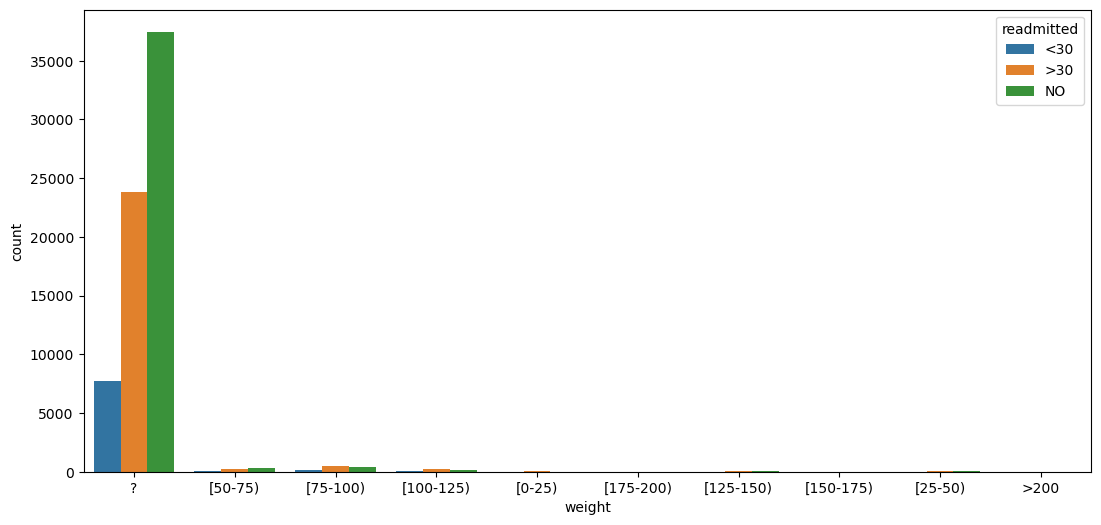

In [35]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='weight', hue='readmitted')

In [36]:
to_drop_features = ['encounter_id', 'patient_nbr','examide','citoglipton','acetohexamide','weight','tolbutamide','troglitazone','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','tolbutamide']

In [37]:
df.drop(columns=to_drop_features,inplace=True)

In [38]:
df.shape

(71235, 39)

We've got 71236 examples in the dataset with 48 featues, 1 ID (`encounter_id`), and the labels (`readmitted`).

By looking at the features and a sample from the data, the features are numerical and catogerical types. What about some descriptive statistics?

## 📉 Data Visualisation


In [39]:
numeric_columns = list(df.select_dtypes(include='number').columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

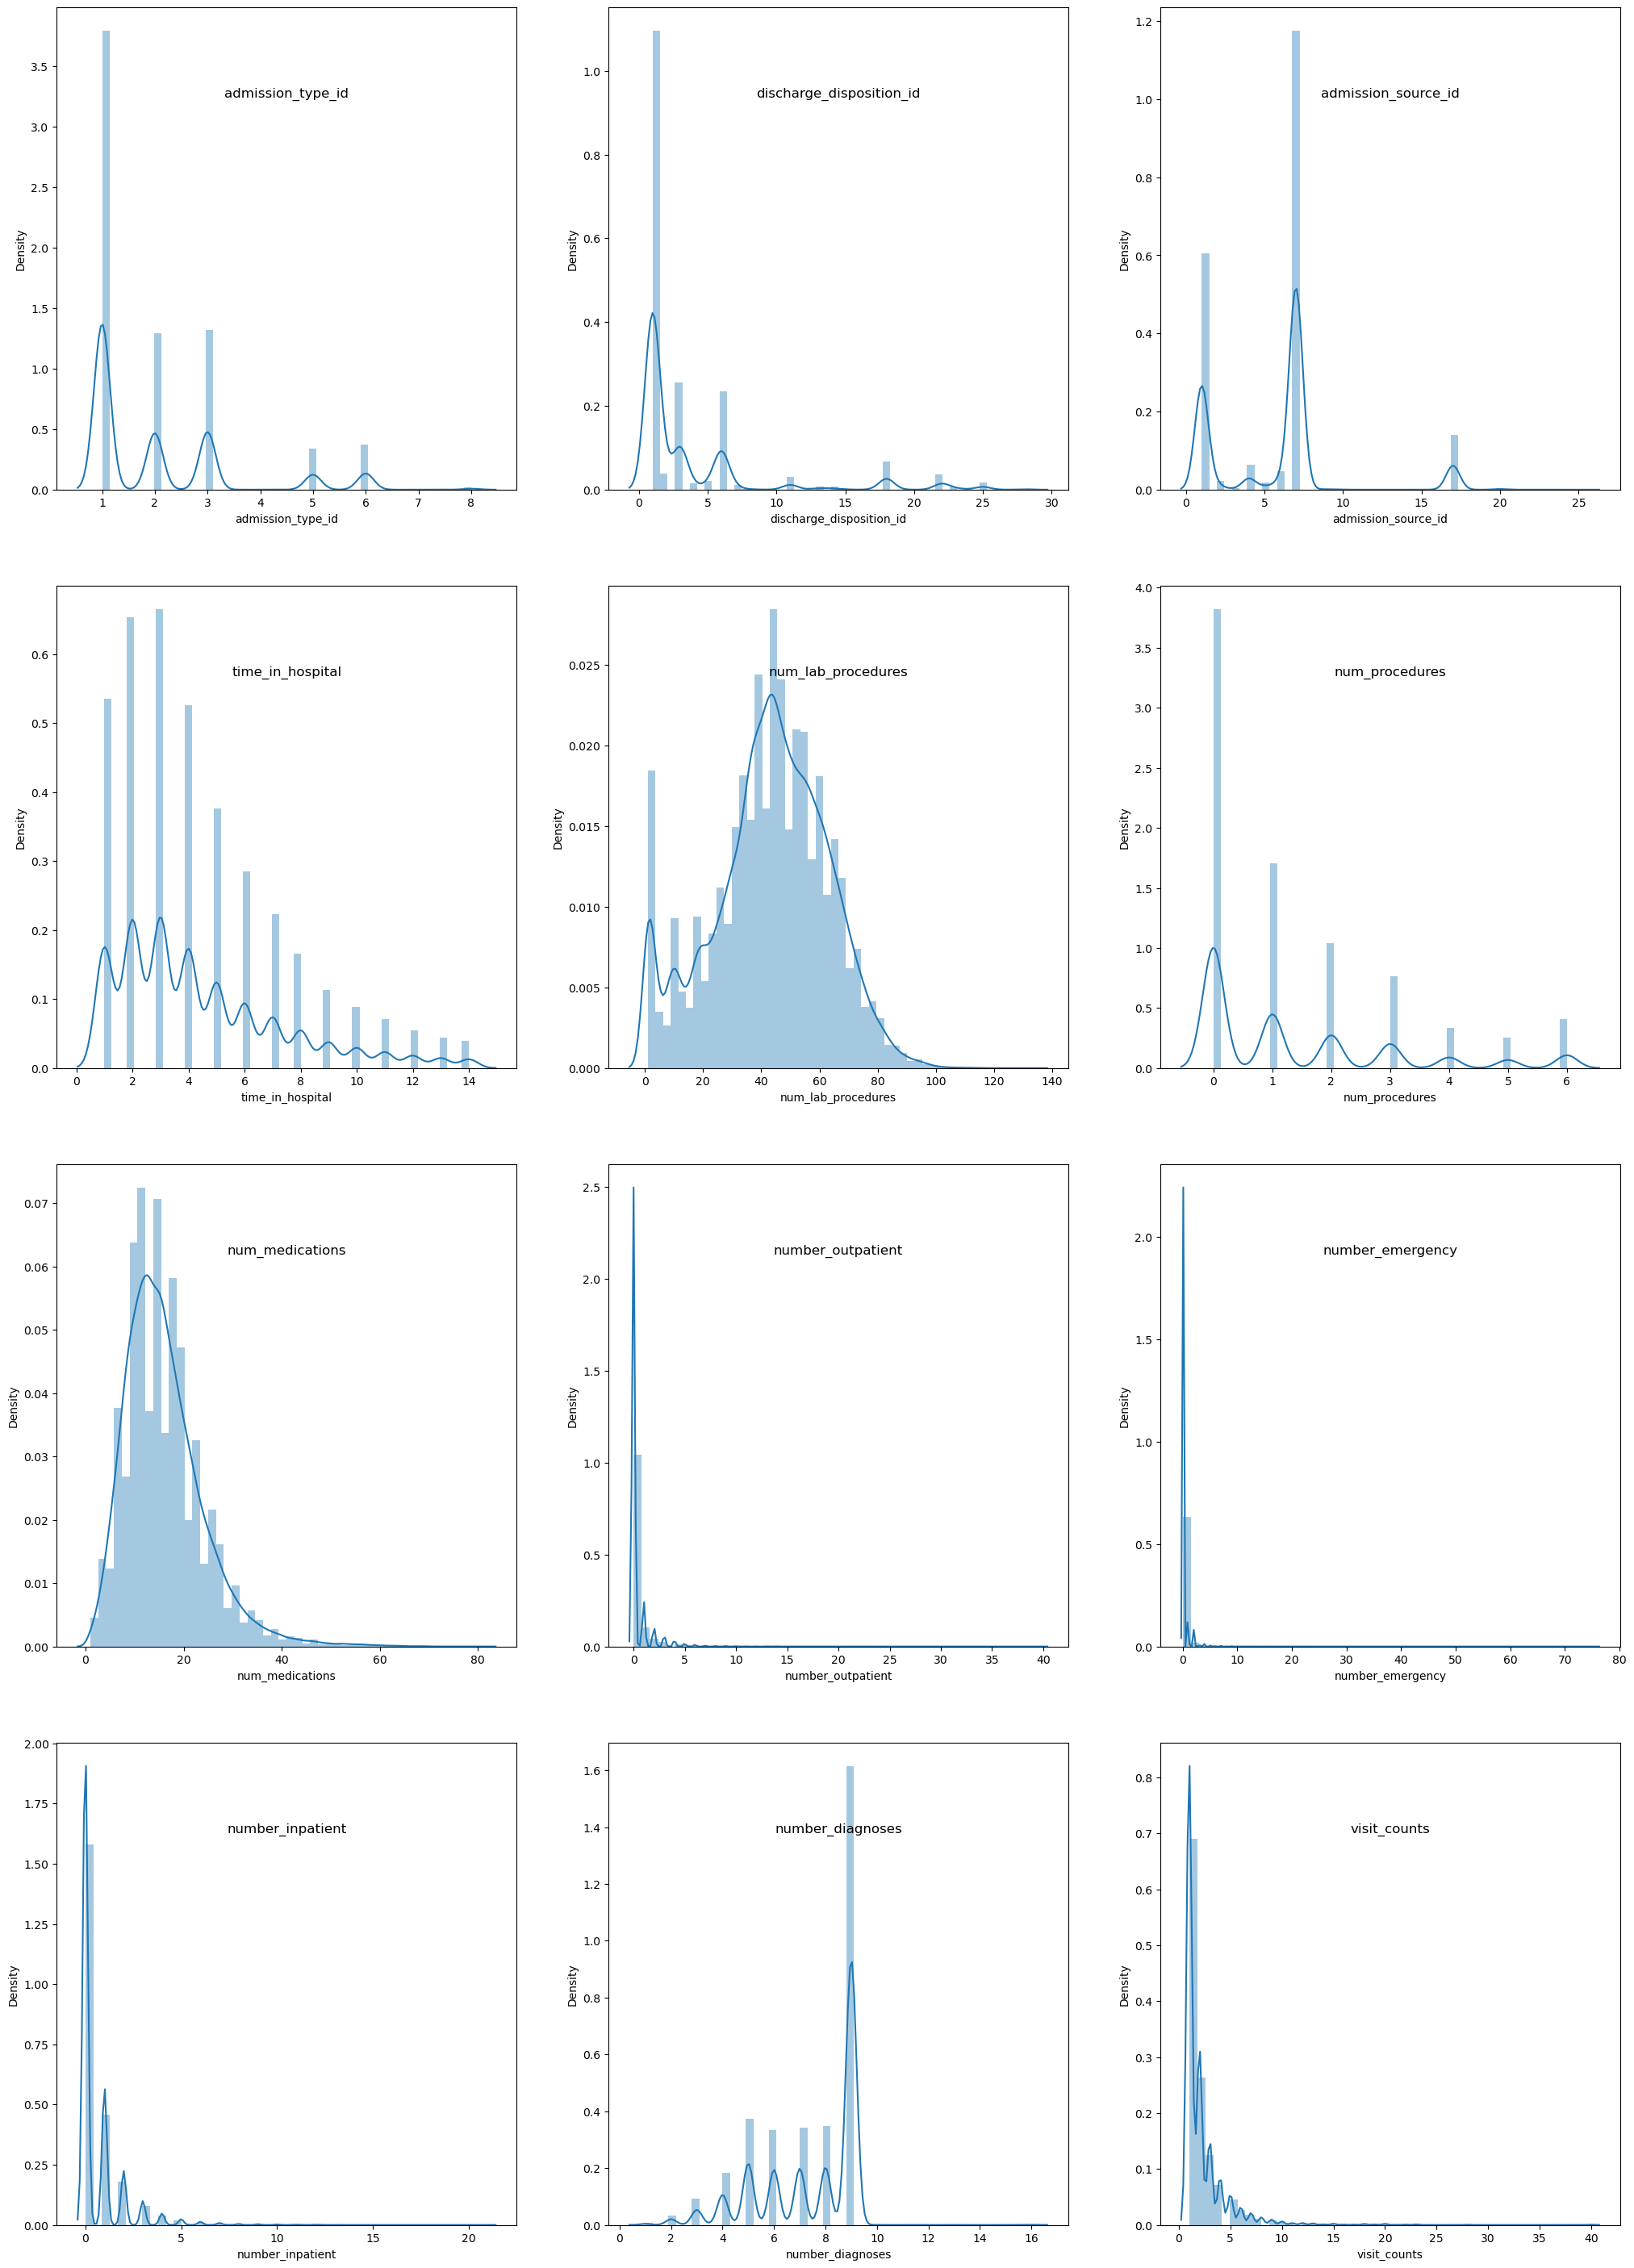

In [40]:
fig, ax=plt.subplots(figsize=(25, 45))
x=1
for col in df[numeric_columns]:  
  plt.subplot(5,3,x)
  sns.distplot(df[col])
  plt.title(col,y=0.8)
  x+=1
     


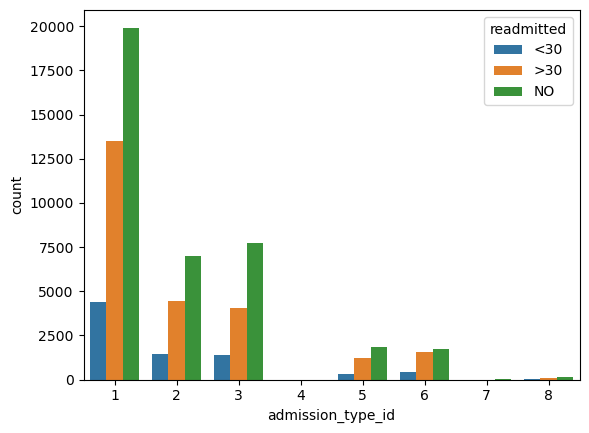

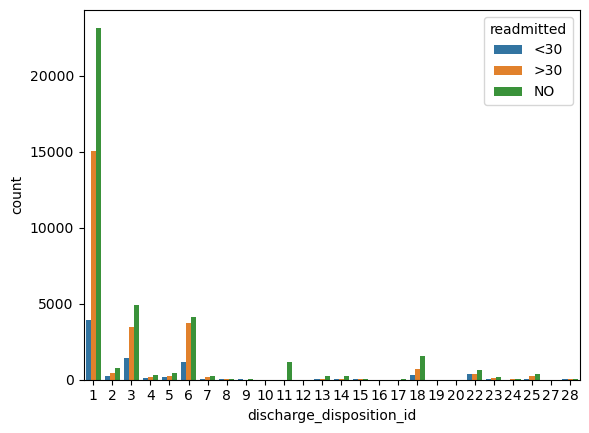

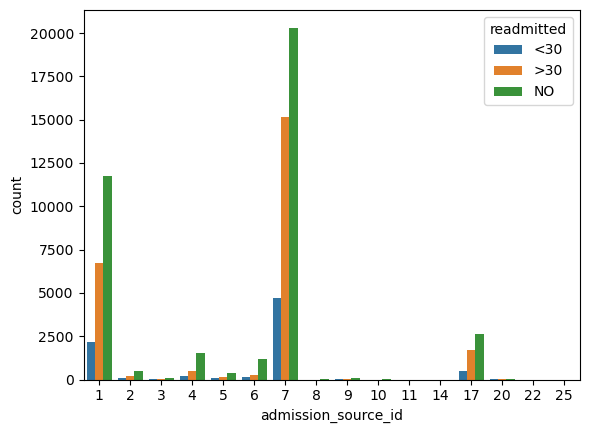

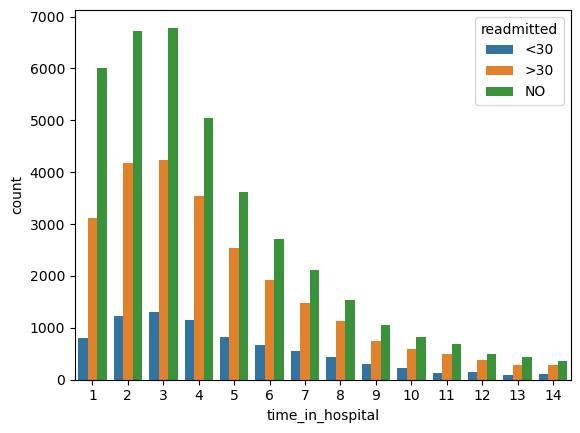

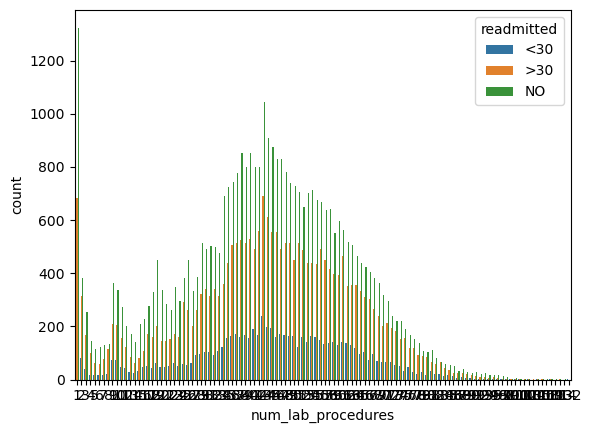

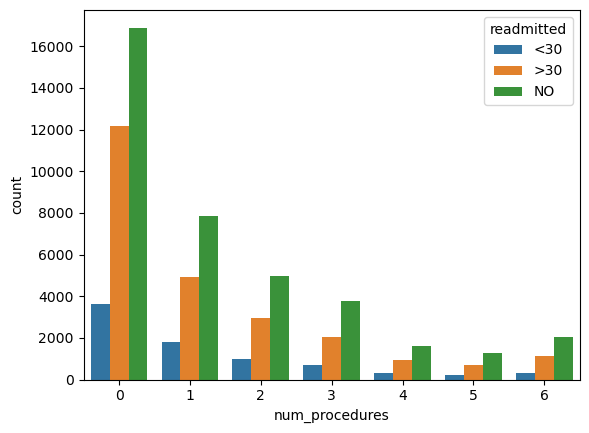

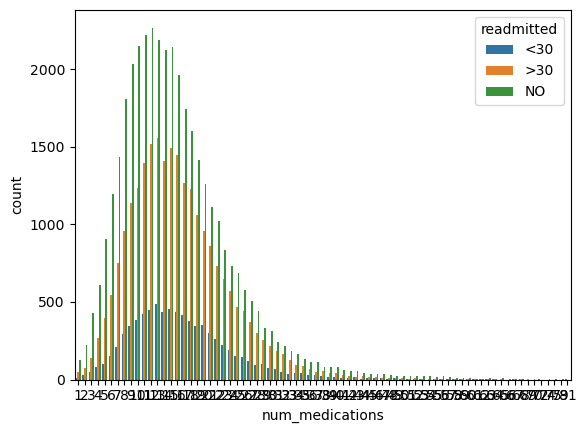

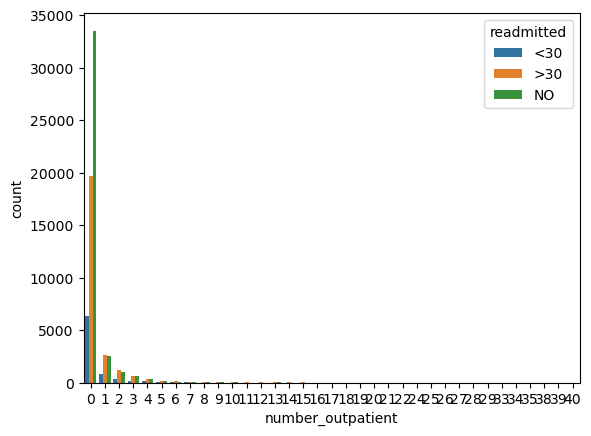

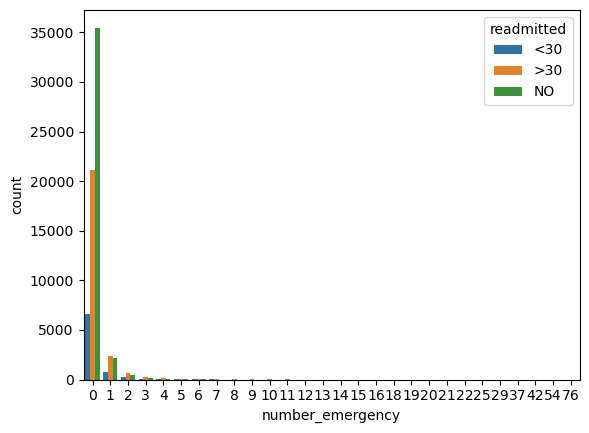

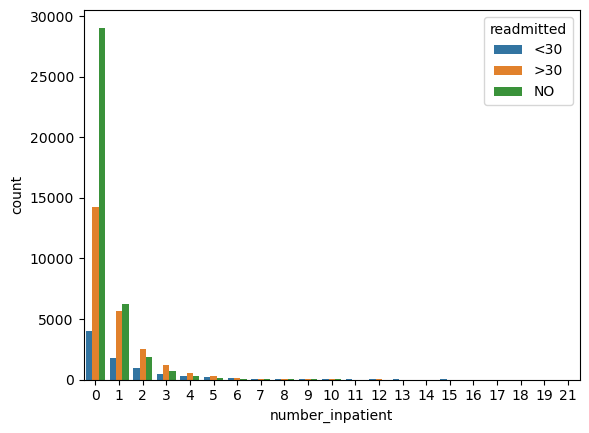

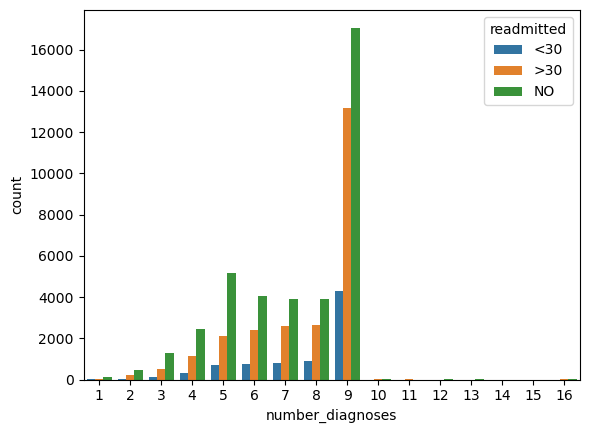

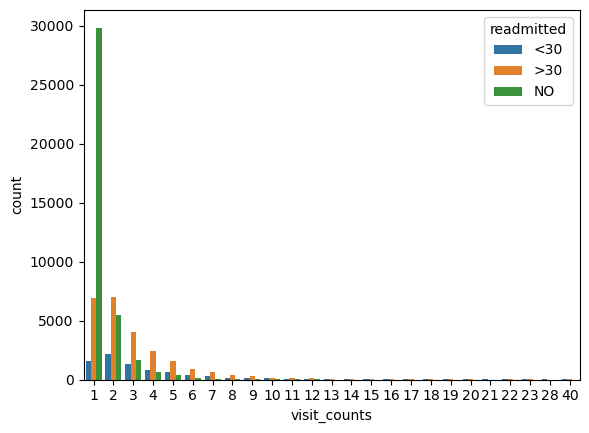

In [41]:
def plot_histogram(df,col):
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.show()


for col in df[numeric_columns]:
    plot_histogram(df, col)

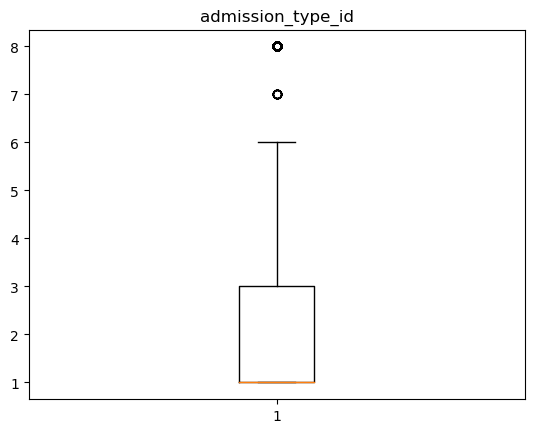

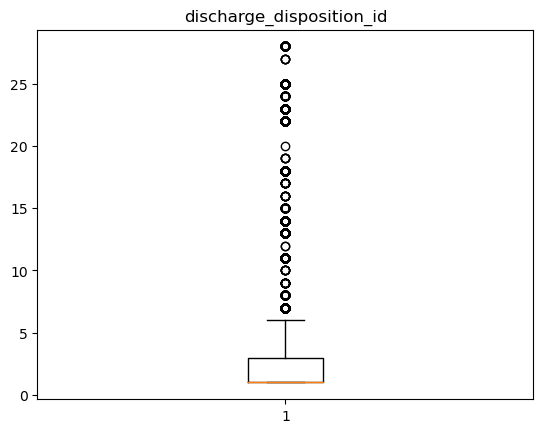

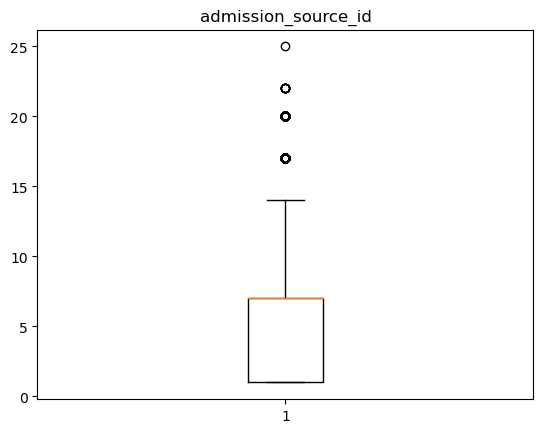

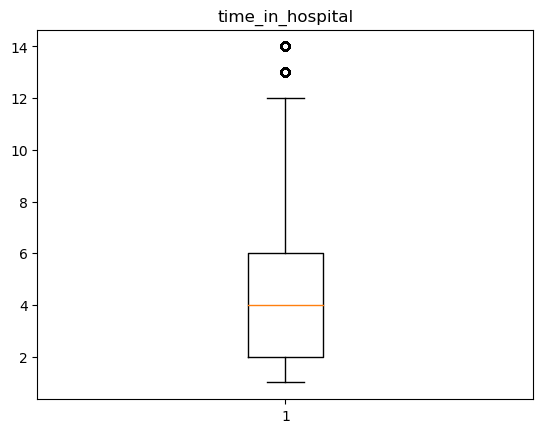

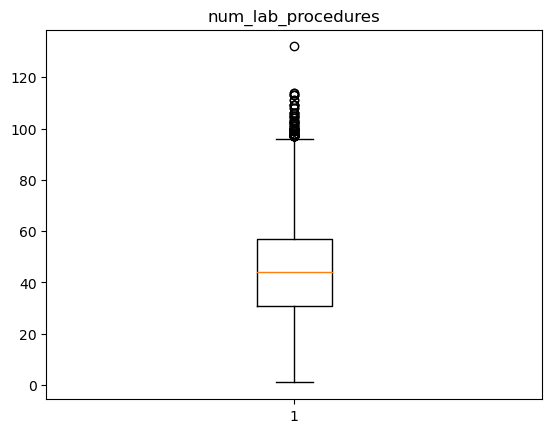

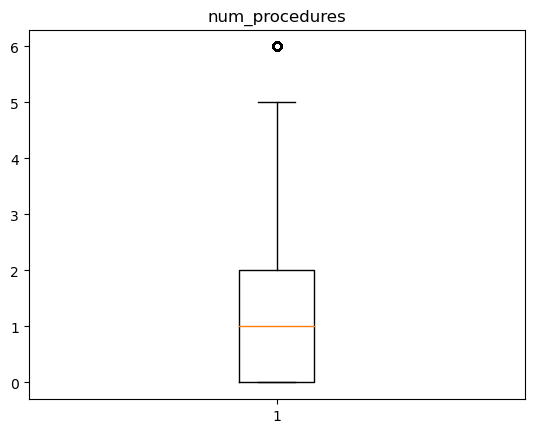

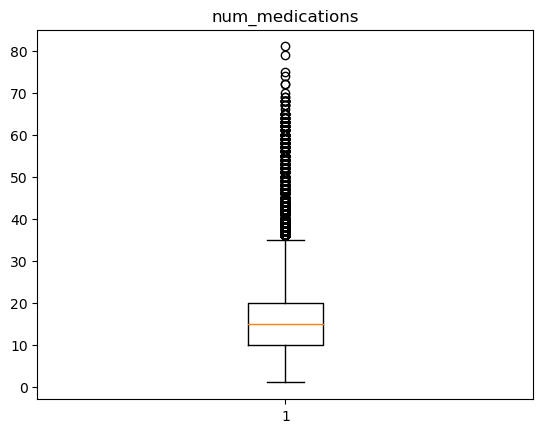

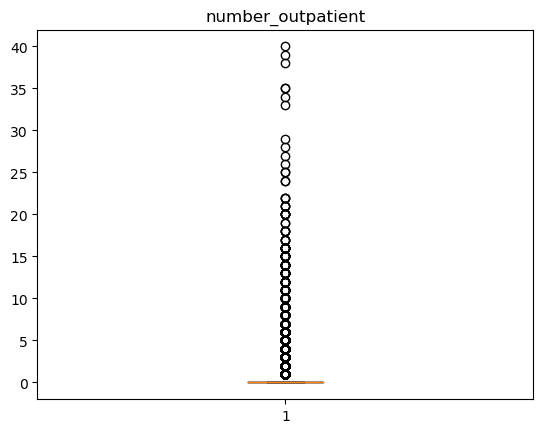

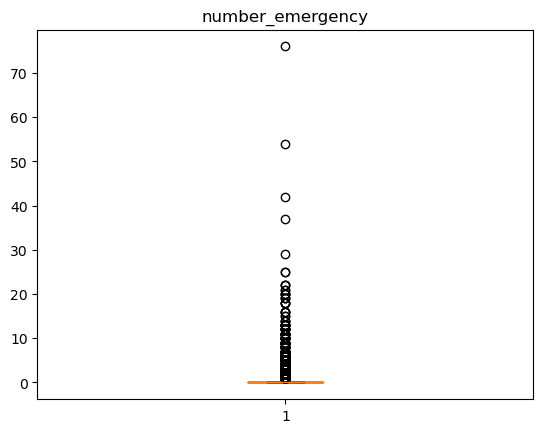

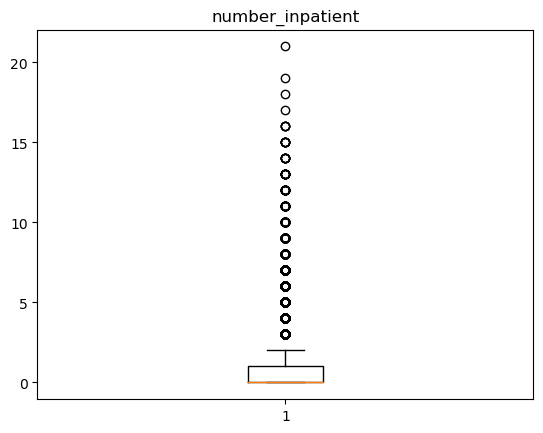

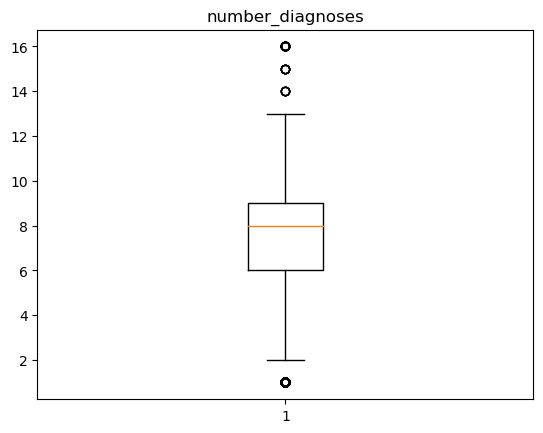

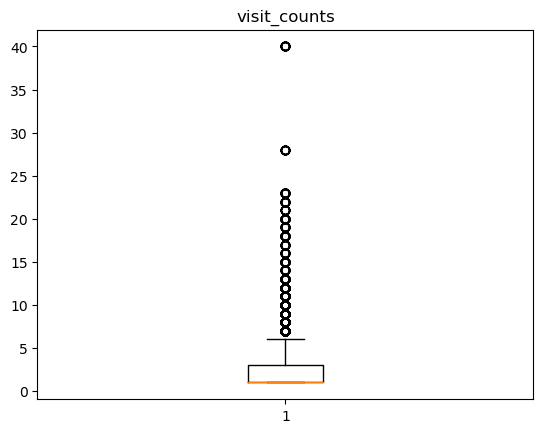

In [42]:
for i in df[numeric_columns]:
  plt.title(i)
  plt.boxplot(df[i])
  plt.show()

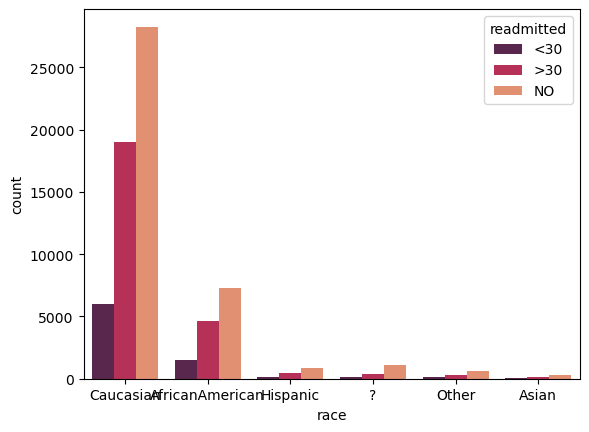

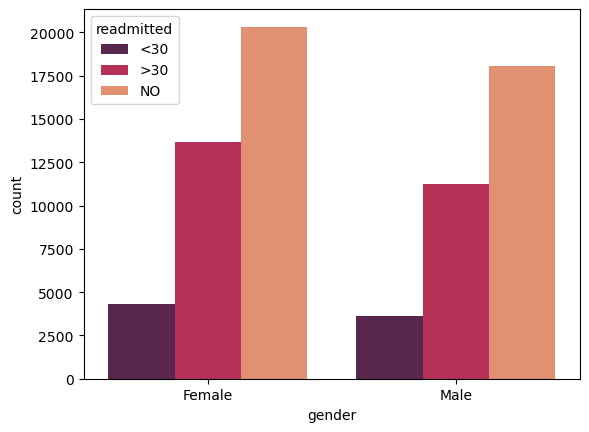

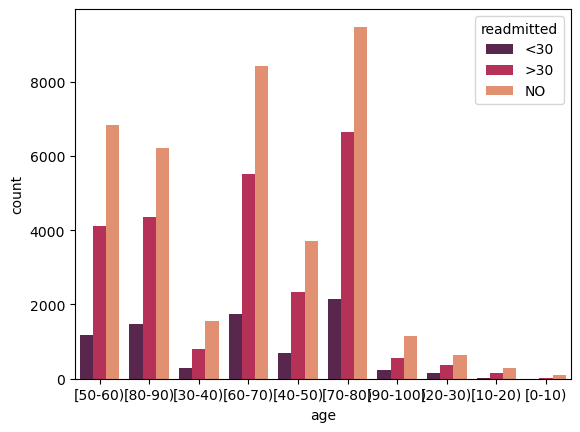

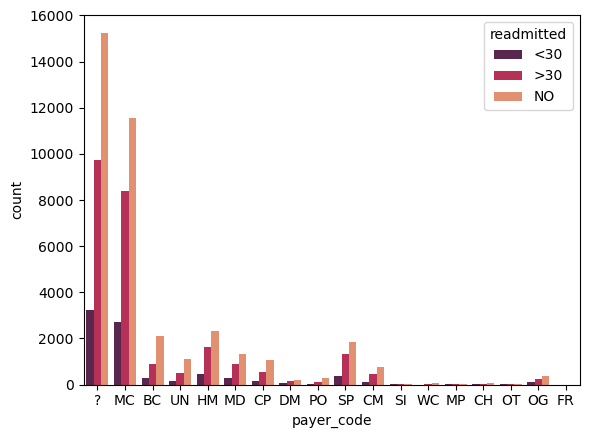

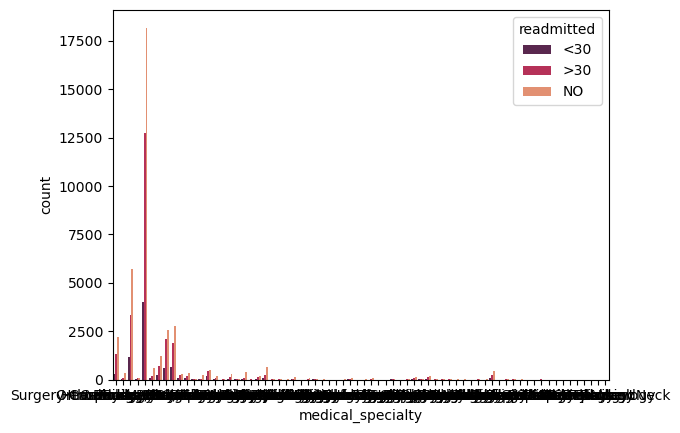

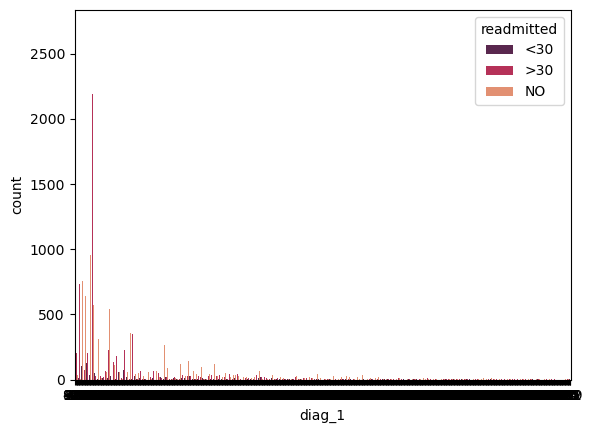

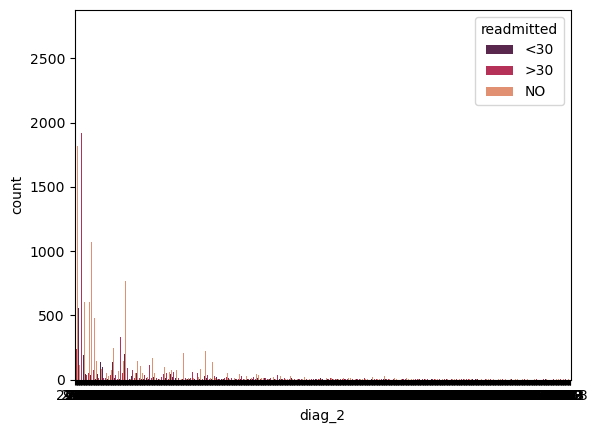

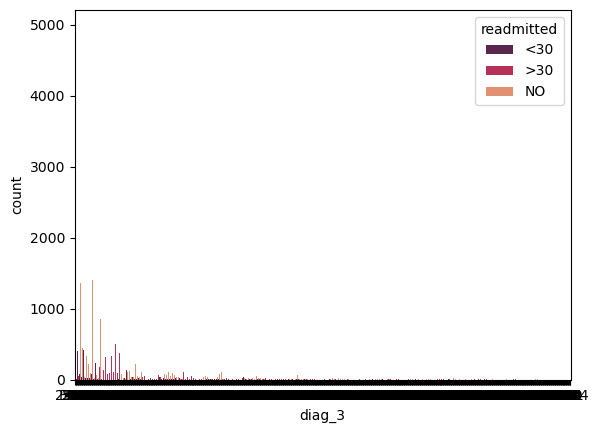

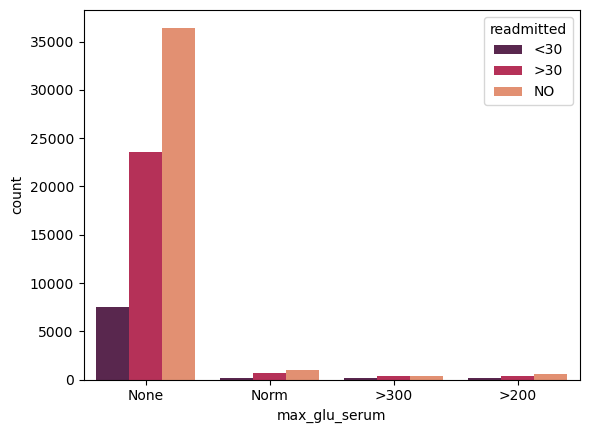

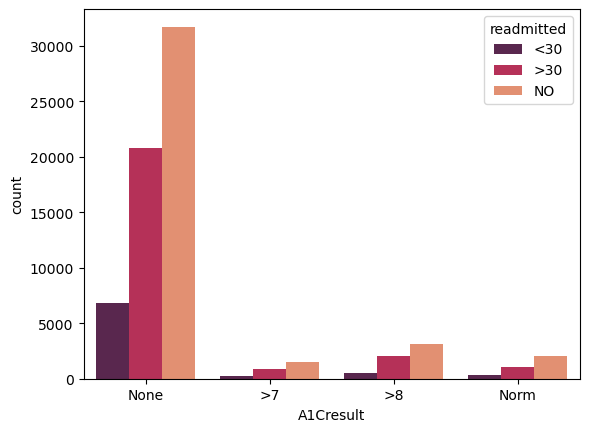

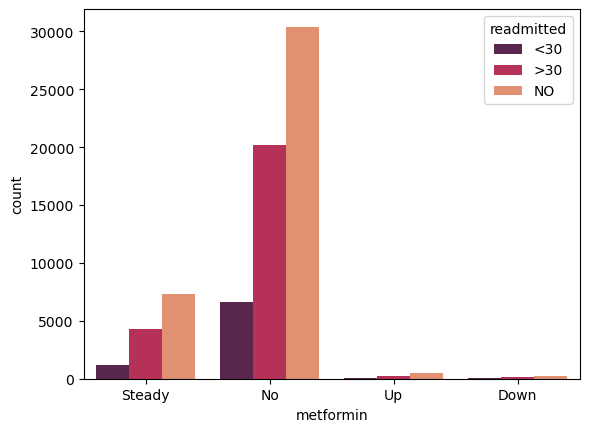

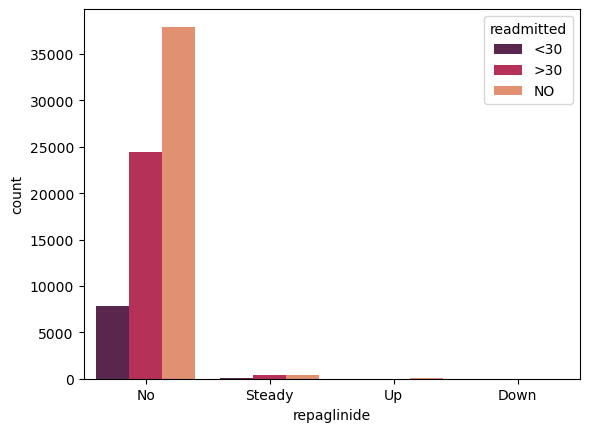

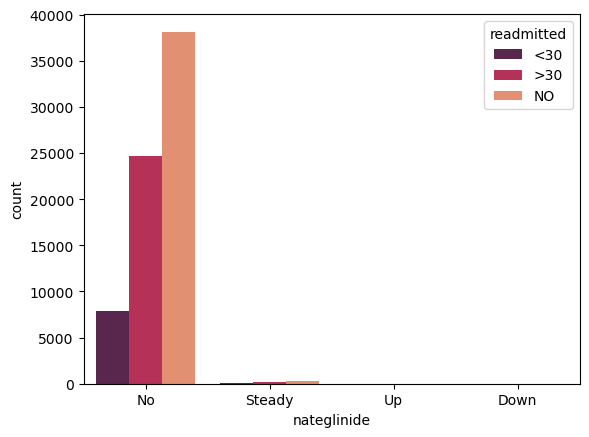

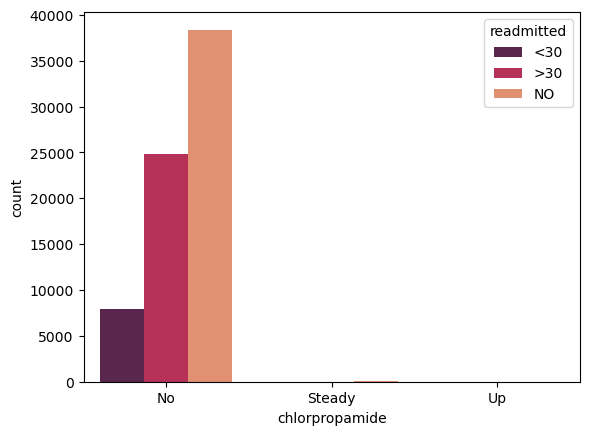

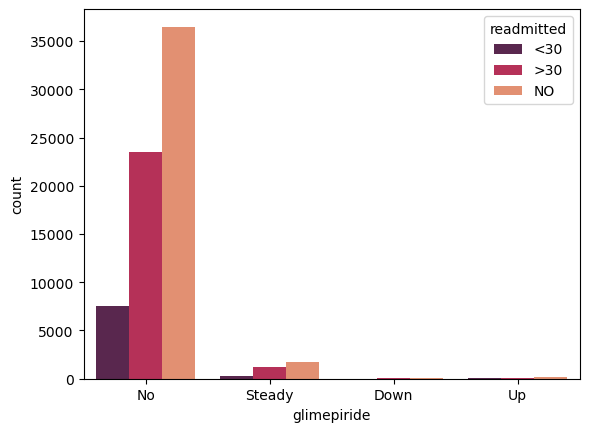

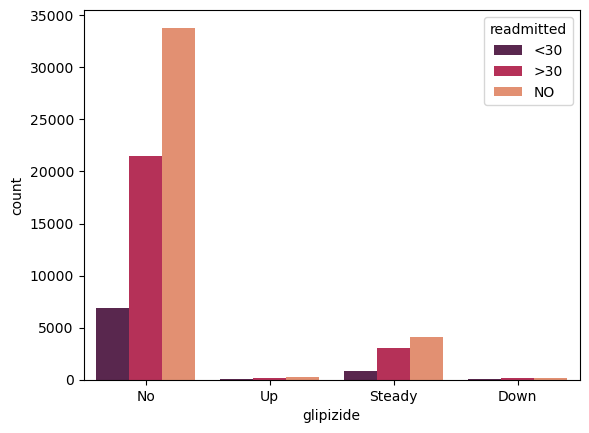

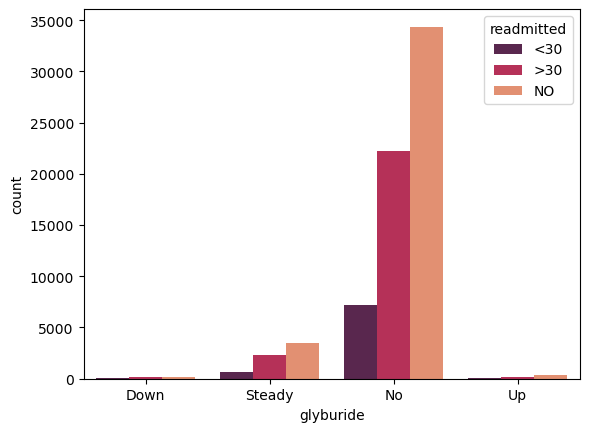

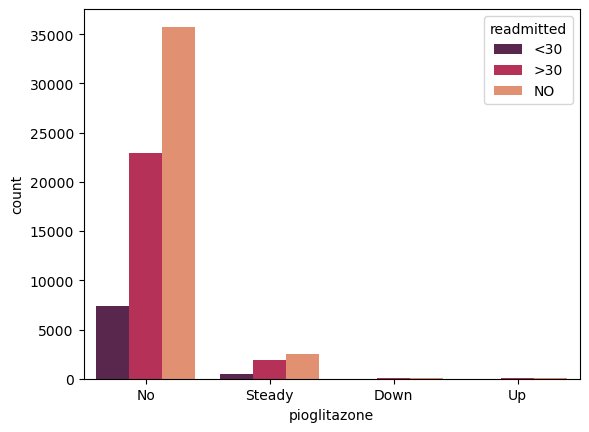

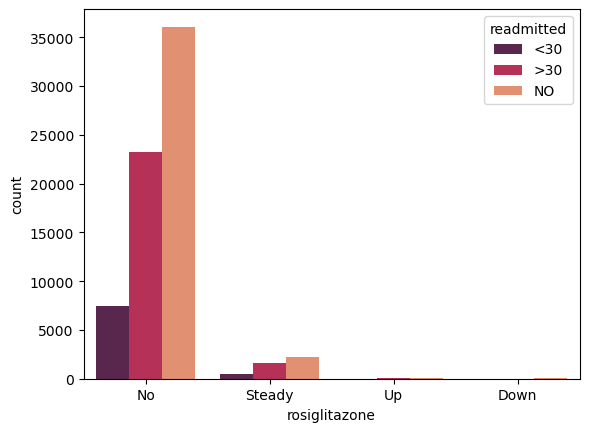

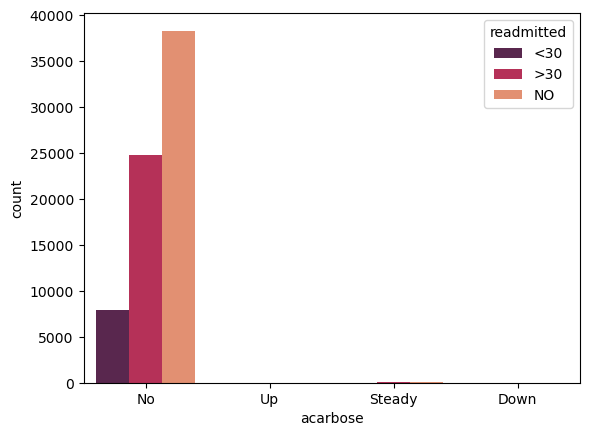

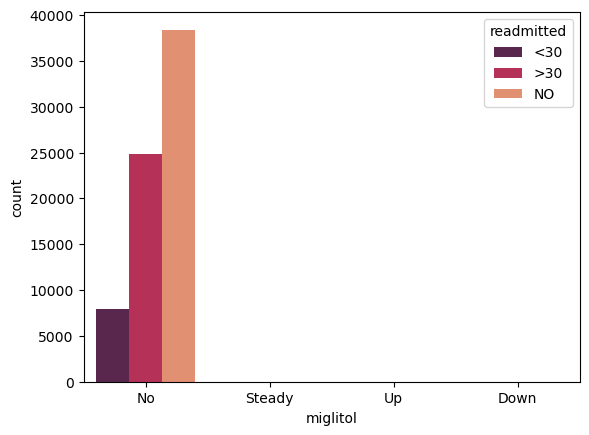

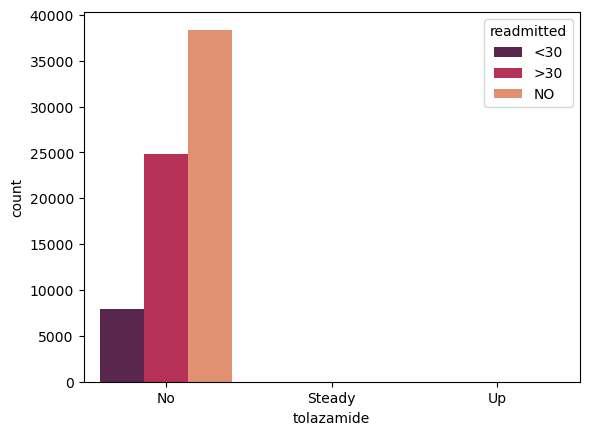

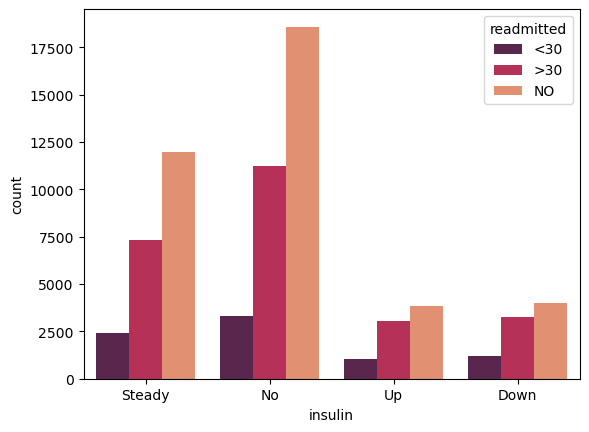

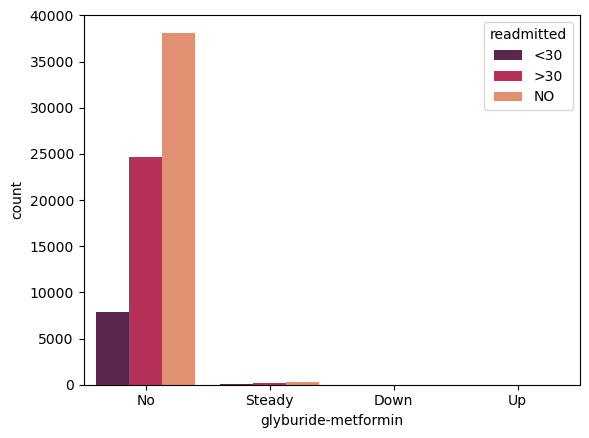

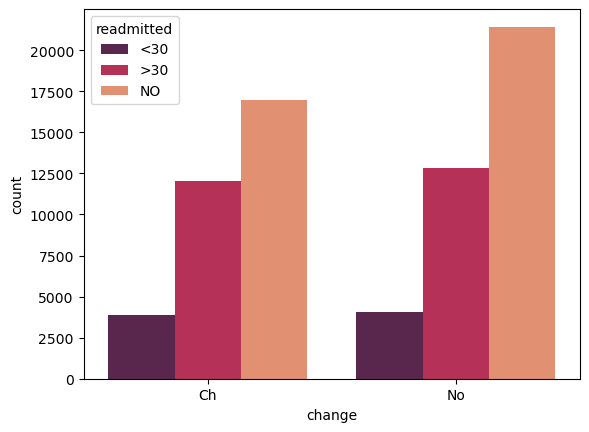

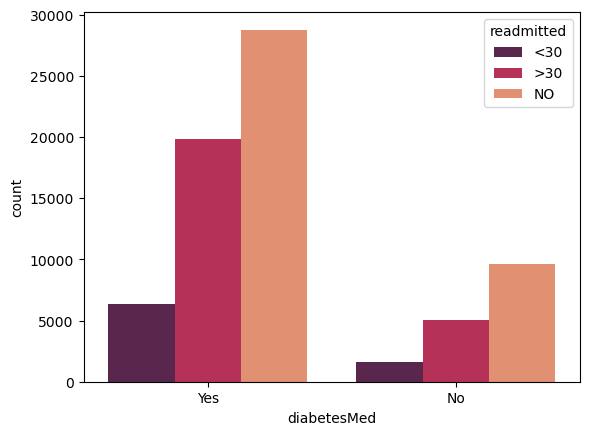

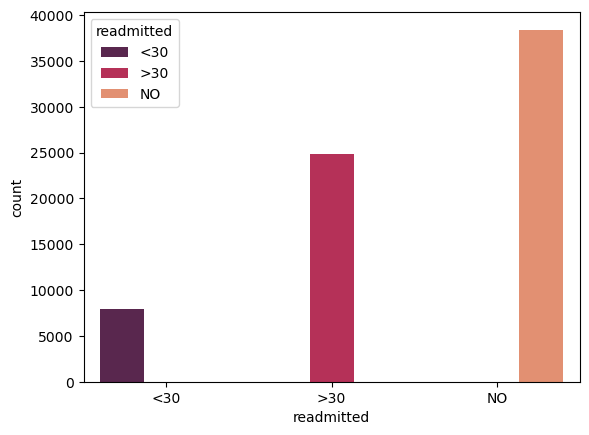

In [43]:
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], palette="rocket",hue='readmitted')
    plt.show()

<AxesSubplot:>

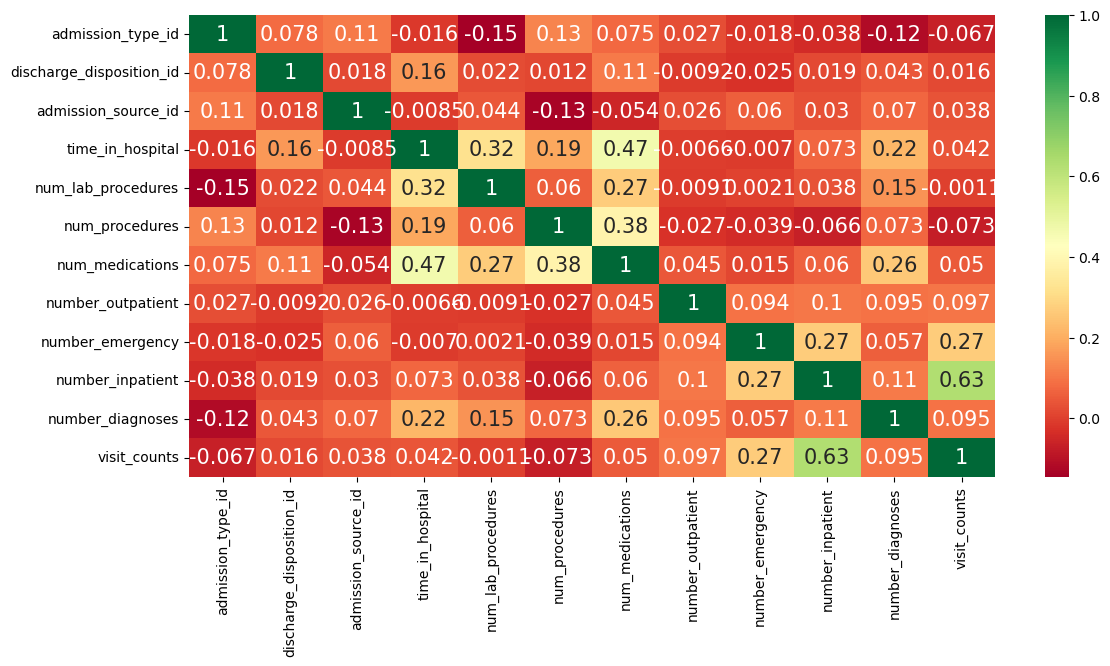

In [44]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

The output shows desciptive statistics for the numerical features. I'll use the numerical features `["time_in_hospital", "num_lab_procedures", "number_diagnoses"]` to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

In [45]:
#selected_features = ["time_in_hospital", "num_lab_procedures", "number_diagnoses"]
#to_drop_features = ['encounter_id', 'patient_nbr', 'readmitted','examide','citoglipton','acetohexamide']

In [46]:
featuers = df.loc[:, df.columns != "readmitted"].copy()
lable = df.loc[:, "readmitted"].copy()

In [47]:
featuers.replace('?',np.NaN,inplace=True)

In [48]:
featuers["chlorpropamide"].value_counts()

No        71173
Steady       59
Up            3
Name: chlorpropamide, dtype: int64

In [49]:
featuers[(featuers['diag_2'] == "240")]

race  gender      age  admission_type_id  \
45046        Caucasian    Male  [40-50)                  1   
46982  AfricanAmerican  Female  [50-60)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
45046                         1                    7                 3   
46982                         1                    7                 1   

      payer_code medical_specialty  num_lab_procedures  ...  pioglitazone  \
45046         SP               NaN                   1  ...            No   
46982         HM               NaN                  57  ...            No   

       rosiglitazone  acarbose  miglitol  tolazamide insulin  \
45046             No        No        No          No  Steady   
46982             No        No        No          No      No   

      glyburide-metformin change  diabetesMed visit_counts  
45046                  No     No          Yes            1  
46982                  No     No           No            1  

[2 rows x 38 columns]

In [50]:
featuers_notenc=featuers.copy()
featuers_notenc.head()

race  gender      age  admission_type_id  \
0        Caucasian  Female  [50-60)                  2   
1        Caucasian  Female  [50-60)                  1   
2        Caucasian  Female  [80-90)                  1   
3        Caucasian  Female  [80-90)                  1   
4  AfricanAmerican  Female  [30-40)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                         1                    1                 8        NaN   
1                         1                    7                 3        NaN   
2                         3                    7                 4         MC   
3                         1                    7                 3        NaN   
4                         1                    7                 5        NaN   

                 medical_specialty  num_lab_procedures  ...  pioglitazone  \
0                       Cardiology                  77  ...            No   
1  Surgery-Cardiovascular/Thoracic                  31  ...            No   
2                 InternalMedicine                  68  ...            No   
3                 InternalMedicine                  46  ...            No   
4                 InternalMedicine                  49  ...            No   

   rosiglitazone  acarbose  miglitol  tolazamide insulin glyburide-metformin  \
0             No        No        No          No  Steady                  No   
1             No        No        No          No      No                  No   
2             No        No        No          No      No                  No   
3             No        No        No          No      No                  No   
4             No        No        No          No      No                  No   

  change  diabetesMed visit_counts  
0     Ch          Yes            2  
1     Ch          Yes            2  
2     No          Yes            1  
3     Ch          Yes            1  
4     No          Yes            1  

[5 rows x 38 columns]

In [51]:
### impu

### Label Encoding for Target Attrition

In [52]:
numeric_columns_enc = list(featuers.select_dtypes(include='number').columns)
categorical_columns_enc = list(featuers.select_dtypes(include="object").columns)

In [53]:
label_encoder = LabelEncoder()
lable = label_encoder.fit_transform(lable)
lable = pd.DataFrame(lable, index=df.index, columns=["readmitted"])
lable.value_counts()

readmitted
2             38404
1             24881
0              7950
dtype: int64

In [54]:
label_encoder.classes_

array(['<30', '>30', 'NO'], dtype=object)

In [55]:
featuers

race  gender      age  admission_type_id  \
0            Caucasian  Female  [50-60)                  2   
1            Caucasian  Female  [50-60)                  1   
2            Caucasian  Female  [80-90)                  1   
3            Caucasian  Female  [80-90)                  1   
4      AfricanAmerican  Female  [30-40)                  1   
...                ...     ...      ...                ...   
71230            Asian  Female  [70-80)                  1   
71231        Caucasian    Male  [40-50)                  1   
71232            Other  Female  [60-70)                  1   
71233            Asian  Female  [70-80)                  1   
71234        Caucasian  Female  [80-90)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             1                    1                 8   
1                             1                    7                 3   
2                             3                    7                 4   
3                             1                    7                 3   
4                             1                    7                 5   
...                         ...                  ...               ...   
71230                         1                    7                 5   
71231                         6                    7                 5   
71232                         1                    7                 1   
71233                         1                    7                 1   
71234                         1                    7                 1   

      payer_code                medical_specialty  num_lab_procedures  ...  \
0            NaN                       Cardiology                  77  ...   
1            NaN  Surgery-Cardiovascular/Thoracic                  31  ...   
2             MC                 InternalMedicine                  68  ...   
3            NaN                 InternalMedicine                  46  ...   
4            NaN                 InternalMedicine                  49  ...   
...          ...                              ...                 ...  ...   
71230         MC                              NaN                  71  ...   
71231        NaN                              NaN                  71  ...   
71232         HM                              NaN                  43  ...   
71233         MC                              NaN                  31  ...   
71234        NaN                              NaN                  73  ...   

       pioglitazone  rosiglitazone  acarbose  miglitol  tolazamide insulin  \
0                No             No        No        No          No  Steady   
1                No             No        No        No          No      No   
2                No             No        No        No          No      No   
3                No             No        No        No          No      No   
4                No             No        No        No          No      No   
...             ...            ...       ...       ...         ...     ...   
71230        Steady             No        No        No          No      Up   
71231            No             No        No        No          No      Up   
71232            No             No        No        No          No    Down   
71233            No             No        No        No          No      No   
71234            No             No        No        No          No      No   

      glyburide-metformin change  diabetesMed visit_counts  
0                      No     Ch          Yes            2  
1                      No     Ch          Yes            2  
2                      No     No          Yes            1  
3                      No     Ch          Yes            1  
4                      No     No          Yes            1  
...                   ...    ...          ...          ...  
71230                  No     Ch          Yes            1  
71231                 

In [56]:
ecoder_list=[]
for col in categorical_columns_enc:
    feauters_encoder = LabelEncoder()
    featuers[col][featuers[col].notnull()]= feauters_encoder.fit_transform(featuers[col][featuers[col].notnull()])
    ecoder_list.append(feauters_encoder)


In [57]:
featuers

race gender age  admission_type_id  discharge_disposition_id  \
0        2      0   5                  2                         1   
1        2      0   5                  1                         1   
2        2      0   8                  1                         3   
3        2      0   8                  1                         1   
4        0      0   3                  1                         1   
...    ...    ...  ..                ...                       ...   
71230    1      0   7                  1                         1   
71231    2      1   4                  1                         6   
71232    4      0   6                  1                         1   
71233    1      0   7                  1                         1   
71234    2      0   8                  1                         1   

       admission_source_id  time_in_hospital payer_code medical_specialty  \
0                        1                 8        NaN                 3   
1                        7                 3        NaN                57   
2                        7                 4          7                17   
3                        7                 3        NaN                17   
4                        7                 5        NaN                17   
...                    ...               ...        ...               ...   
71230                    7                 5          7               NaN   
71231                    7                 5        NaN               NaN   
71232                    7                 1          6               NaN   
71233                    7                 1          7               NaN   
71234                    7                 1        NaN               NaN   

       num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  \
0                      77  ...             1              1         1   
1                      31  ...             1              1         1   
2                      68  ...             1              1         1   
3                      46  ...             1              1         1   
4                      49  ...             1              1         1   
...                   ...  ...           ...            ...       ...   
71230                  71  ...             2              1         1   
71231                  71  ...             1              1         1   
71232                  43  ...             1              1         1   
71233                  31  ...             1              1         1   
71234                  73  ...             1              1         1   

       miglitol  tolazamide insulin glyburide-metformin change  diabetesMed  \
0             1           0       2                   1      0            1   
1             1           0       1                   1      0            1   
2             1           0       1                   1      1            1   
3             1           0       1                   1      0            1   
4             1           0       1                   1      1            1   
...         ...         ...     ...                 ...    ...          ...   
71230         1           0       3                   1      0            1   
71231         1           0       3                   1      0            1   
71232         1           0       0                   1      0            1   
71233         1           0       1                   1      1            1   
71234         1           0       1                   1      1            0   

      visit_counts  
0                2  
1                2  
2                1  
3                1  
4                1  
...            ...  
71230            1  
71231            1  
71232            1  
71233            1  
71234            1  

[71235 rows x 38 columns]

In [58]:
ecoder_list[0].classes_

array(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'],
      dtype=object)

In [59]:
x=featuers.copy()

### Dealing with nan values 

In [60]:
# create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# fit and transform the dataframe
df_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# print the imputed dataframe
print(df_imputed)

       race  gender  age  admission_type_id  discharge_disposition_id  \
0       2.0     0.0  5.0                2.0                       1.0   
1       2.0     0.0  5.0                1.0                       1.0   
2       2.0     0.0  8.0                1.0                       3.0   
3       2.0     0.0  8.0                1.0                       1.0   
4       0.0     0.0  3.0                1.0                       1.0   
...     ...     ...  ...                ...                       ...   
71230   1.0     0.0  7.0                1.0                       1.0   
71231   2.0     1.0  4.0                1.0                       6.0   
71232   4.0     0.0  6.0                1.0                       1.0   
71233   1.0     0.0  7.0                1.0                       1.0   
71234   2.0     0.0  8.0                1.0                       1.0   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0                      1.0               8.0

In [61]:
#df_imputed.payer_code.value_counts().sort_index()
for i in df_imputed.columns : 
    df_imputed[i] = round(df_imputed[i]).astype('int')
    
df_imputed

race  gender  age  admission_type_id  discharge_disposition_id  \
0         2       0    5                  2                         1   
1         2       0    5                  1                         1   
2         2       0    8                  1                         3   
3         2       0    8                  1                         1   
4         0       0    3                  1                         1   
...     ...     ...  ...                ...                       ...   
71230     1       0    7                  1                         1   
71231     2       1    4                  1                         6   
71232     4       0    6                  1                         1   
71233     1       0    7                  1                         1   
71234     2       0    8                  1                         1   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0                        1                 8           4                  3   
1                        7                 3           7                 57   
2                        7                 4           7                 17   
3                        7                 3           7                 17   
4                        7                 5           6                 17   
...                    ...               ...         ...                ...   
71230                    7                 5           7                 14   
71231                    7                 5           6                 20   
71232                    7                 1           6                 30   
71233                    7                 1           7                 17   
71234                    7                 1           8                 15   

       num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  \
0                      77  ...             1              1         1   
1                      31  ...             1              1         1   
2                      68  ...             1              1         1   
3                      46  ...             1              1         1   
4                      49  ...             1              1         1   
...                   ...  ...           ...            ...       ...   
71230                  71  ...             2              1         1   
71231                  71  ...             1              1         1   
71232                  43  ...             1              1         1   
71233                  31  ...             1              1         1   
71234                  73  ...             1              1         1   

       miglitol  tolazamide  insulin  glyburide-metformin  change  \
0             1           0        2                    1       0   
1             1           0        1                    1       0   
2             1           0        1                    1       1   
3             1           0        1                    1       0   
4             1           0        1                    1       1   
...         ...         ...      ...                  ...     ...   
71230         1           0        3                    1       0   
71231         1           0        3                    1       0   
71232         1           0        0                    1       0   
71233         1           0        1                    1       1   
71234         1           0        1                    1       1   

       diabetesMed  visit_counts  
0                1             2  
1                1             2  
2                1             1  
3                1             1  
4                1             1  
...            ...           ...  
71230            1             1  
71231            1             1  
71232            1             1  
71233            1             1  
71234            0             1  

[71235 rows x 38 columns]

In [62]:
df_imputed.payer_code.value_counts().sort_index()

0      3305
1       106
2      1370
3      2081
4      1419
5      2587
6      9451
7     30577
8      7380
9      3163
10     2941
11      600
12      769
13      125
14     3534
15     1730
16       97
Name: payer_code, dtype: int64

In [63]:
x.payer_code.value_counts().sort_index()

0      3302
1       101
2      1328
3      1764
4       388
5         1
6      4380
7     22647
8      2469
9        54
10      720
11       63
12      410
13       42
14     3522
15     1729
16       97
Name: payer_code, dtype: int64

In [64]:
numeric_columns_enc

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'visit_counts']

### Data scaling and transformation

In [65]:
dff=df_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications','number_outpatient',
 'number_emergency',
 'number_inpatient',]]

In [66]:
dfp=df_imputed[['number_diagnoses',
 'visit_counts']]

In [67]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [68]:
pt.fit(dff)

PowerTransformer()

In [69]:
dt=pt.transform(dff)

In [70]:
dt

array([[ 0.54917335, -0.8007166 , -1.37959069, ..., -0.44330407,
        -0.35483349, -0.70587143],
       [-0.89973049, -0.8007166 ,  0.47452407, ..., -0.44330407,
        -0.35483349,  1.2304101 ],
       [-0.89973049,  0.76156102,  0.47452407, ..., -0.44330407,
        -0.35483349, -0.70587143],
       ...,
       [-0.89973049, -0.8007166 ,  0.47452407, ..., -0.44330407,
        -0.35483349, -0.70587143],
       [-0.89973049, -0.8007166 ,  0.47452407, ..., -0.44330407,
        -0.35483349, -0.70587143],
       [-0.89973049, -0.8007166 ,  0.47452407, ..., -0.44330407,
        -0.35483349, -0.70587143]])

In [71]:

dt=pd.DataFrame(dt,columns=['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications','number_outpatient',
 'number_emergency',
 'number_inpatient'])

In [72]:

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

In [73]:

dt2=transformer.transform(dfp)

In [74]:

dt2=pd.DataFrame(dt2,columns=['number_diagnoses',
 'visit_counts'])

In [75]:
dt2

number_diagnoses  visit_counts
0              2.197225      1.098612
1              1.791759      1.098612
2              2.302585      0.693147
3              2.302585      0.693147
4              1.386294      0.693147
...                 ...           ...
71230          2.302585      0.693147
71231          2.302585      0.693147
71232          1.791759      0.693147
71233          2.302585      0.693147
71234          2.302585      0.693147

[71235 rows x 2 columns]

In [76]:
dff

admission_type_id  discharge_disposition_id  admission_source_id  \
0                      2                         1                    1   
1                      1                         1                    7   
2                      1                         3                    7   
3                      1                         1                    7   
4                      1                         1                    7   
...                  ...                       ...                  ...   
71230                  1                         1                    7   
71231                  1                         6                    7   
71232                  1                         1                    7   
71233                  1                         1                    7   
71234                  1                         1                    7   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                     8                  77               6               33   
1                     3                  31               1               14   
2                     4                  68               2               23   
3                     3                  46               0               20   
4                     5                  49               0                5   
...                 ...                 ...             ...              ...   
71230                 5                  71               3               31   
71231                 5                  71               1               18   
71232                 1                  43               0                5   
71233                 1                  31               0                6   
71234                 1                  73               1               11   

       number_outpatient  number_emergency  number_inpatient  
0                      0                 0                 0  
1                      0                 0                 1  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 0                 0  
...                  ...               ...               ...  
71230                  0                 0                 0  
71231                  0                 0                 0  
71232                  0                 0                 0  
71233                  0                 0                 0  
71234                  0                 0                 0  

[71235 rows x 10 columns]

In [77]:
df_imputed[['number_diagnoses',
 'visit_counts']]=dt2

In [78]:

df_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications','number_outpatient',
 'number_emergency',
 'number_inpatient',]]=dt

In [79]:
df_imputed.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
0     2       0    5           0.549173                 -0.800717   
1     2       0    5          -0.899730                 -0.800717   
2     2       0    8          -0.899730                  0.761561   
3     2       0    8          -0.899730                 -0.800717   
4     0       0    3          -0.899730                 -0.800717   

   admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0            -1.379591          1.214201           4                  3   
1             0.474524         -0.272532           7                 57   
2             0.474524          0.147460           7                 17   
3             0.474524         -0.272532           7                 17   
4             0.474524          0.484407           6                 17   

   num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  miglitol  \
0            1.729280  ...             1              1         1         1   
1           -0.617779  ...             1              1         1         1   
2            1.268975  ...             1              1         1         1   
3            0.145817  ...             1              1         1         1   
4            0.298777  ...             1              1         1         1   

   tolazamide  insulin  glyburide-metformin  change  diabetesMed  visit_counts  
0           0        2                    1       0            1      1.098612  
1           0        1                    1       0            1      1.098612  
2           0        1                    1       1            1      0.693147  
3           0        1                    1       0            1      0.693147  
4           0        1                    1       1            1      0.693147  

[5 rows x 38 columns]

### Check correlation 

In [80]:

all_data=pd.concat([df_imputed,lable],axis=1)
all_data.tail()

race  gender  age  admission_type_id  discharge_disposition_id  \
71230     1       0    7           -0.89973                 -0.800717   
71231     2       1    4           -0.89973                  1.322169   
71232     4       0    6           -0.89973                 -0.800717   
71233     1       0    7           -0.89973                 -0.800717   
71234     2       0    8           -0.89973                 -0.800717   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
71230             0.474524          0.484407           7                 14   
71231             0.474524          0.484407           6                 20   
71232             0.474524         -1.632304           6                 30   
71233             0.474524         -1.632304           7                 17   
71234             0.474524         -1.632304           8                 15   

       num_lab_procedures  ...  rosiglitazone  acarbose  miglitol  tolazamide  \
71230            1.422363  ...              1         1         1           0   
71231            1.422363  ...              1         1         1           0   
71232           -0.007070  ...              1         1         1           0   
71233           -0.617779  ...              1         1         1           0   
71234            1.524648  ...              1         1         1           0   

       insulin  glyburide-metformin  change  diabetesMed  visit_counts  \
71230        3                    1       0            1      0.693147   
71231        3                    1       0            1      0.693147   
71232        0                    1       0            1      0.693147   
71233        1                    1       1            1      0.693147   
71234        1                    1       1            0      0.693147   

       readmitted  
71230           1  
71231           1  
71232           2  
71233           2  
71234           2  

[5 rows x 39 columns]

In [81]:
all_data.iloc[cop_drop]

race  gender  age  admission_type_id  discharge_disposition_id  \
6239     0       0    7           1.698366                  1.759009   

      admission_source_id  time_in_hospital  payer_code  medical_specialty  \
6239            -1.379591         -1.632304           4                 68   

      num_lab_procedures  ...  rosiglitazone  acarbose  miglitol  tolazamide  \
6239           -0.668602  ...              1         1         1           0   

      insulin  glyburide-metformin  change  diabetesMed  visit_counts  \
6239        1                    1       1            0       1.94591   

      readmitted  
6239           1  

[1 rows x 39 columns]

plt.figure(figsize=(30,10))
sns.heatmap(all_data.corr(), annot=True, cmap="RdYlGn")

In [82]:
all_data["readmitted"].value_counts()

2    38404
1    24881
0     7950
Name: readmitted, dtype: int64

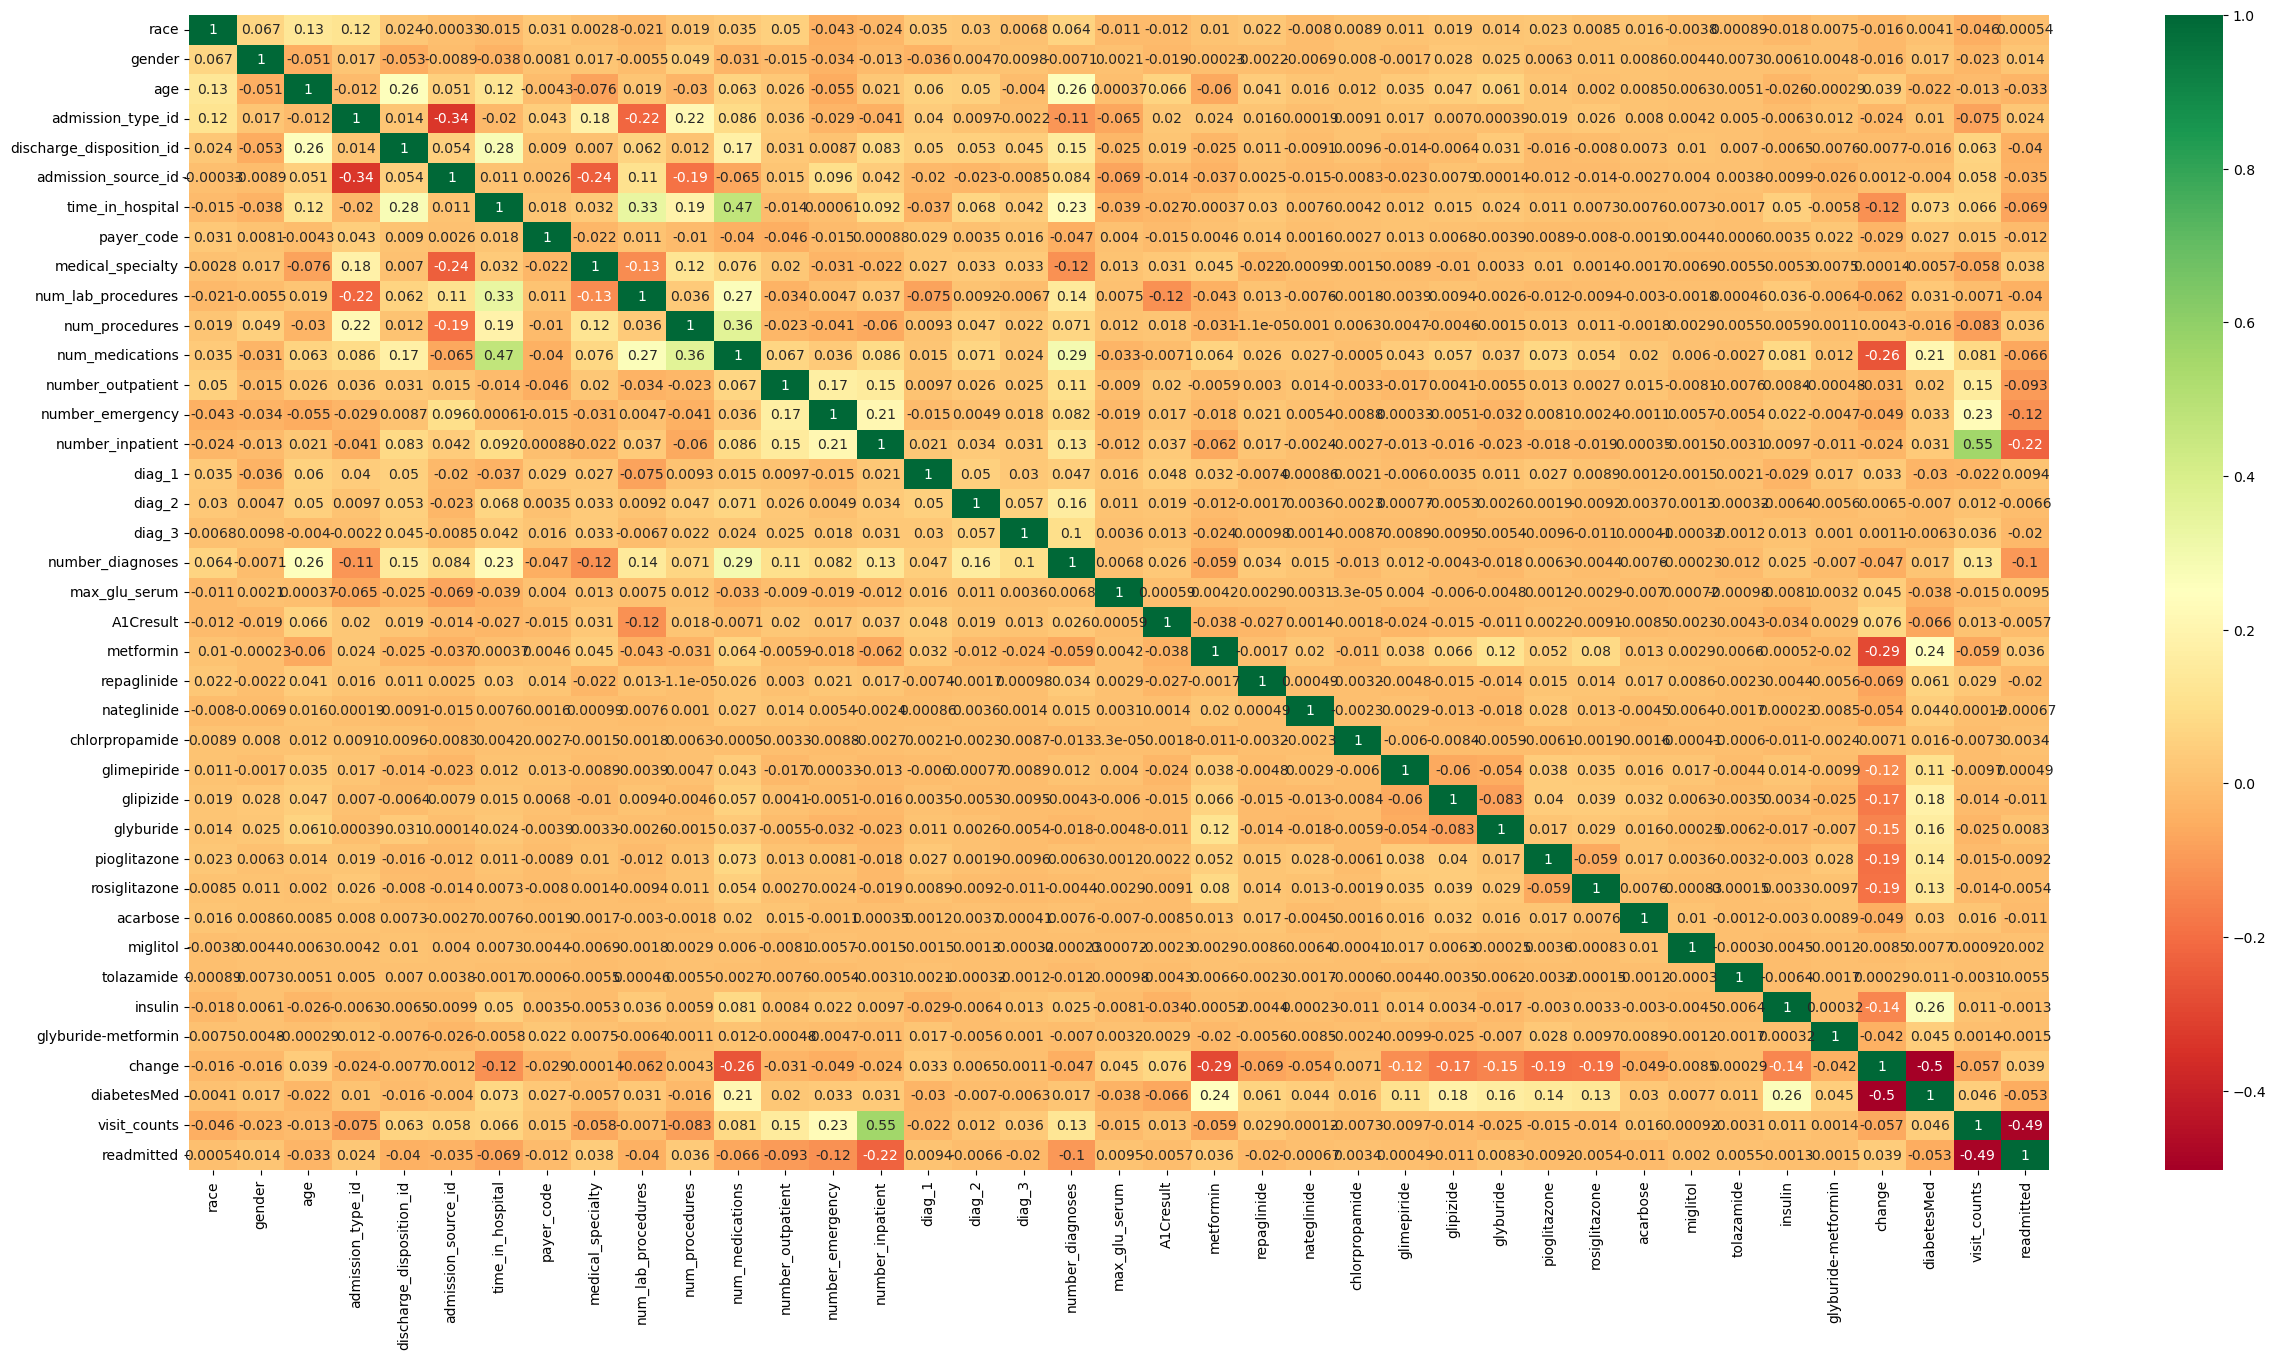

In [83]:
plt.figure(figsize=(30,15))
sns.heatmap(all_data.corr(), annot=True, cmap="RdYlGn")
plt.savefig('save_as_a_png.png')

In [84]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71235 entries, 0 to 71234
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71235 non-null  int64  
 1   gender                    71235 non-null  int64  
 2   age                       71235 non-null  int64  
 3   admission_type_id         71235 non-null  float64
 4   discharge_disposition_id  71235 non-null  float64
 5   admission_source_id       71235 non-null  float64
 6   time_in_hospital          71235 non-null  float64
 7   payer_code                71235 non-null  int64  
 8   medical_specialty         71235 non-null  int64  
 9   num_lab_procedures        71235 non-null  float64
 10  num_procedures            71235 non-null  float64
 11  num_medications           71235 non-null  float64
 12  number_outpatient         71235 non-null  float64
 13  number_emergency          71235 non-null  float64
 14  number

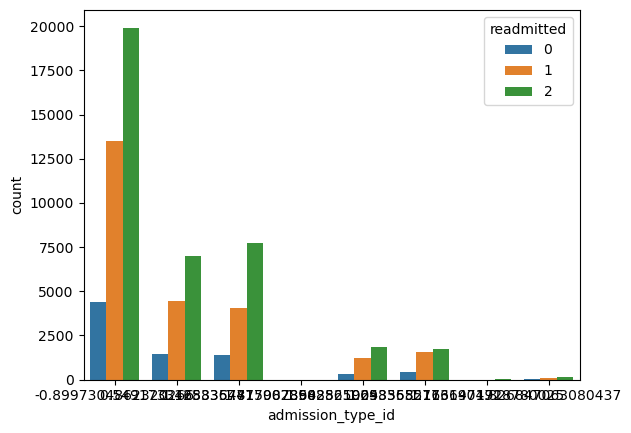

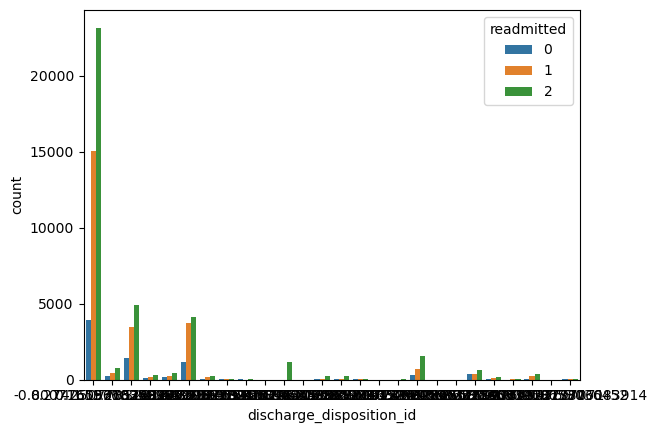

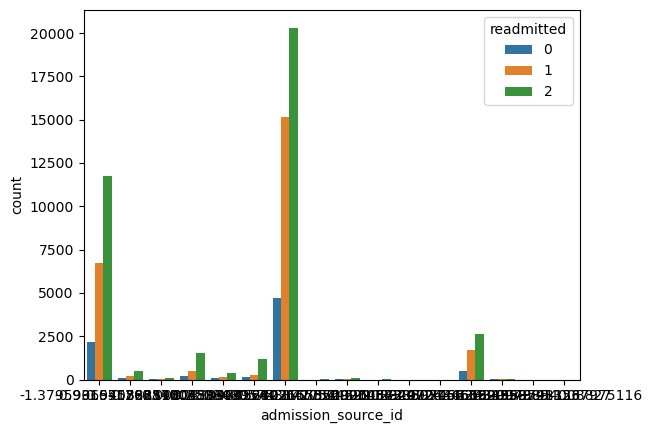

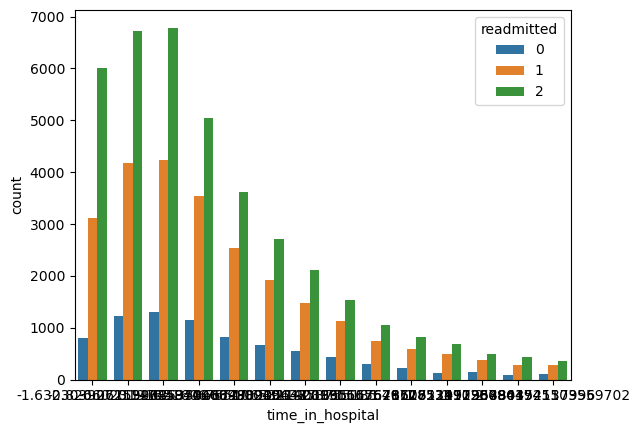

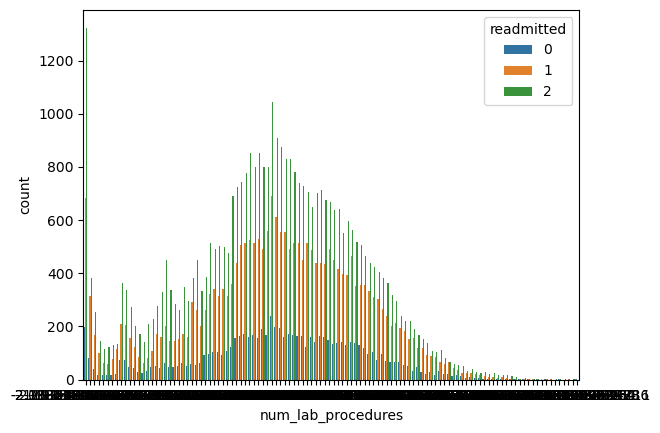

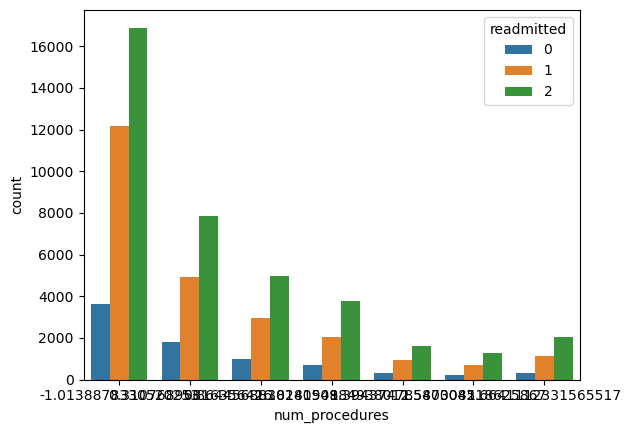

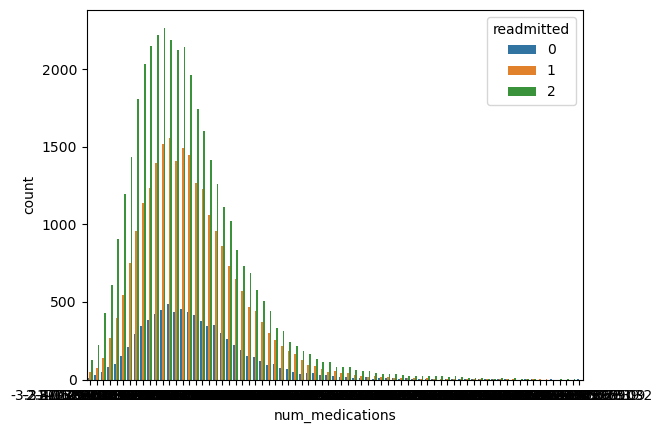

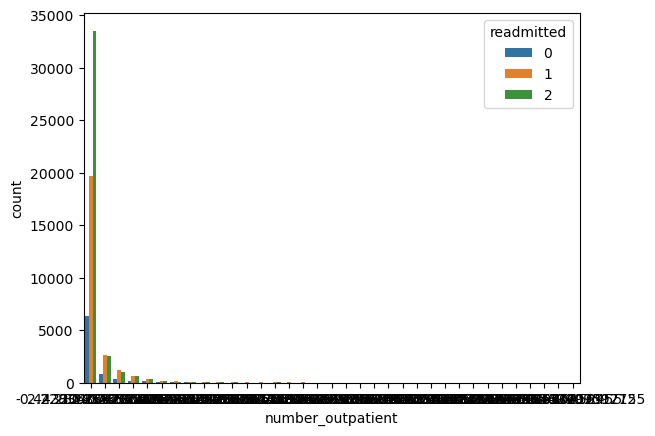

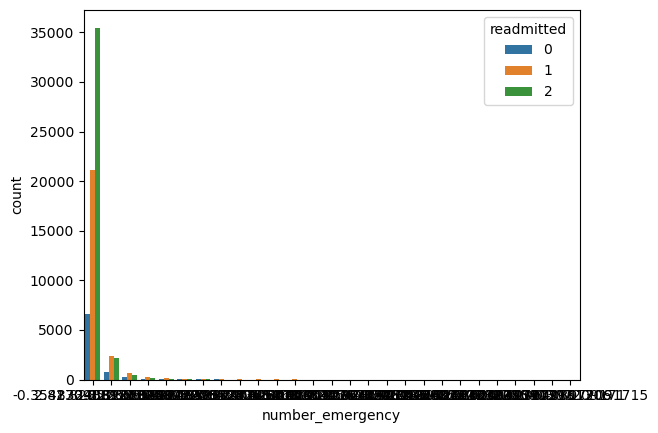

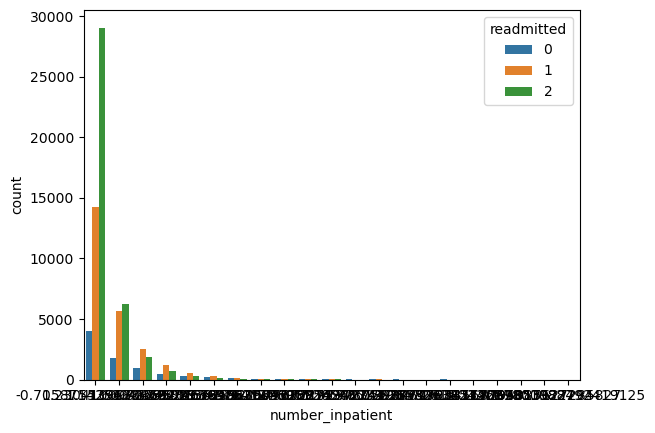

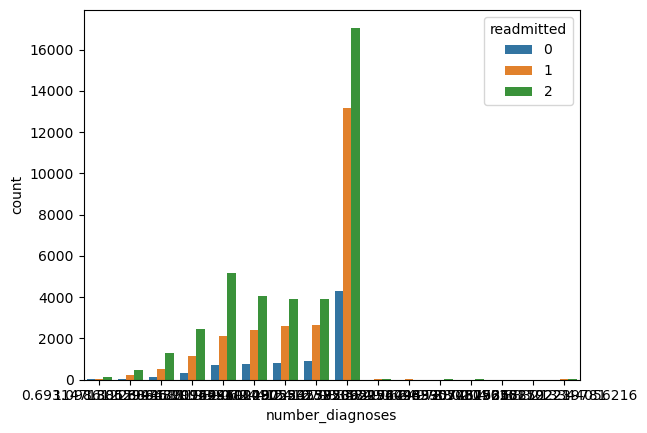

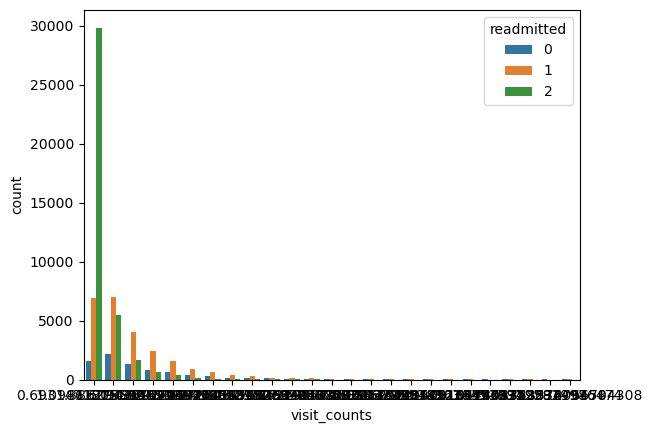

In [85]:
def plot_histogram(df,col):
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.show()


for col in all_data[numeric_columns_enc]:
    plot_histogram(all_data, col)

In [86]:
pca_alldata=all_data.copy()

In [87]:
all_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed', 'visit_counts', 'readmitted'],
      dtype='object')

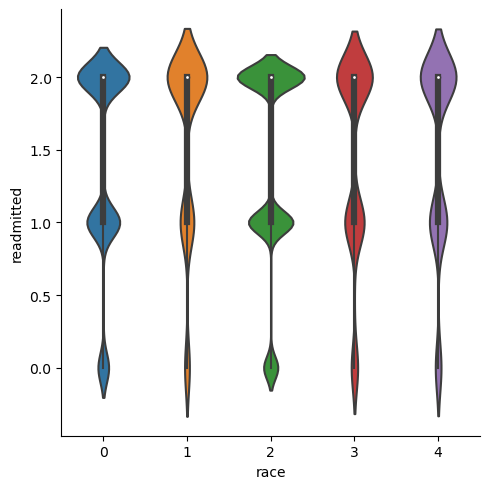

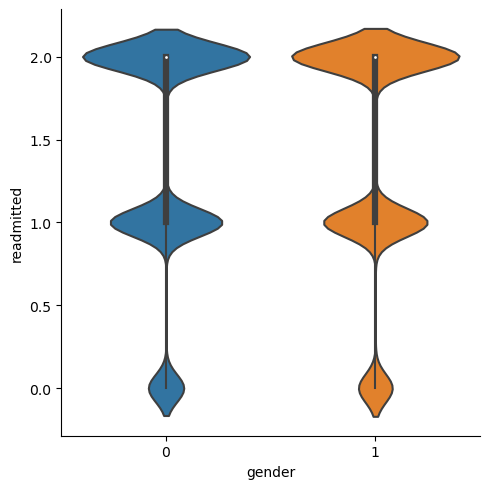

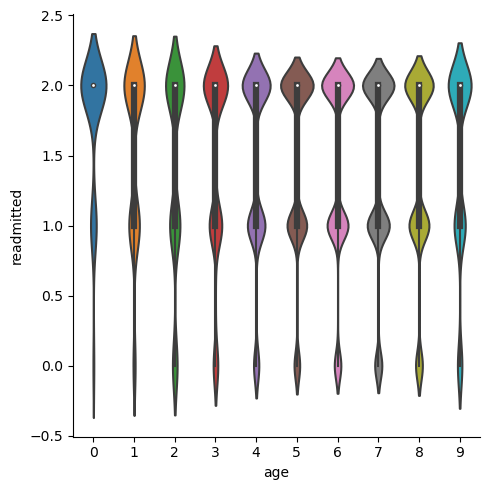

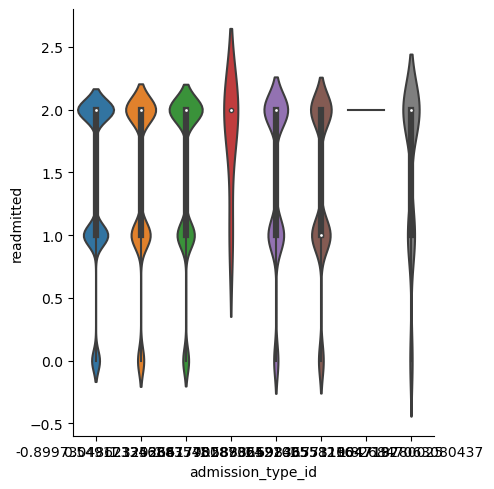

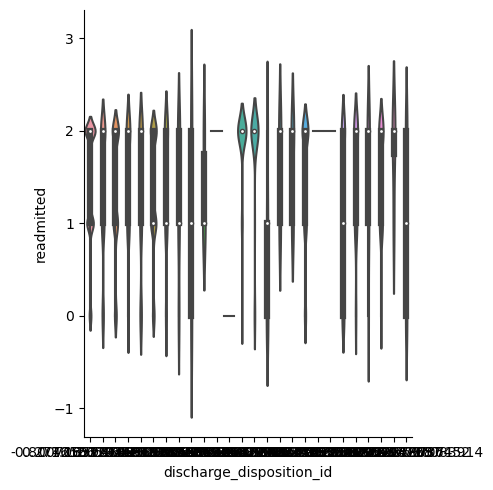

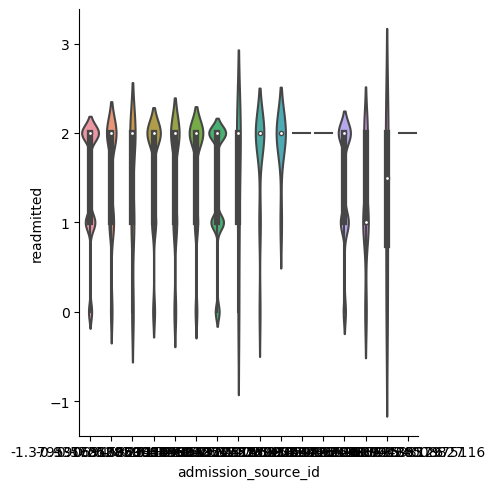

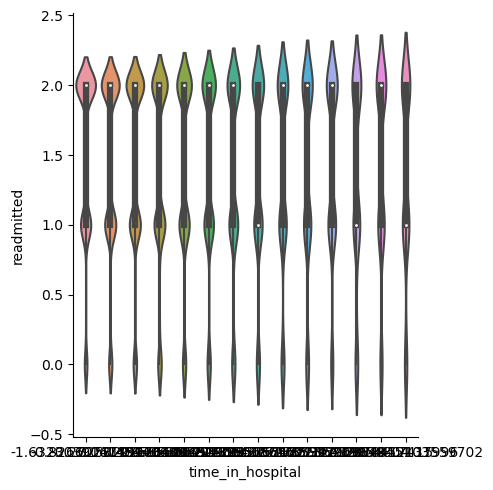

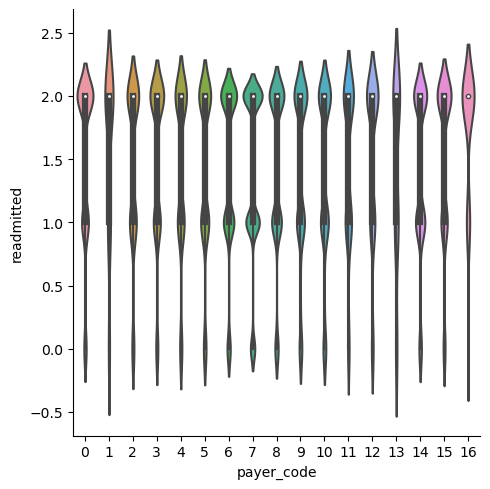

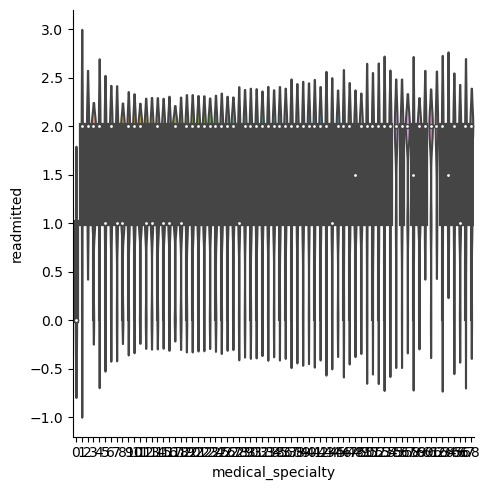

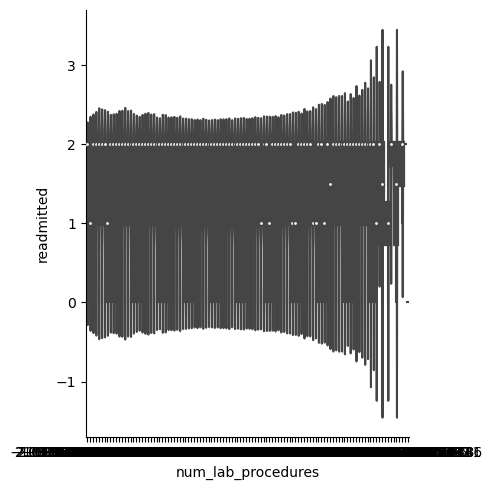

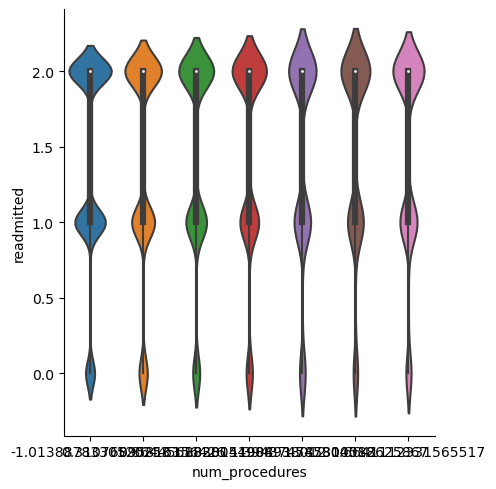

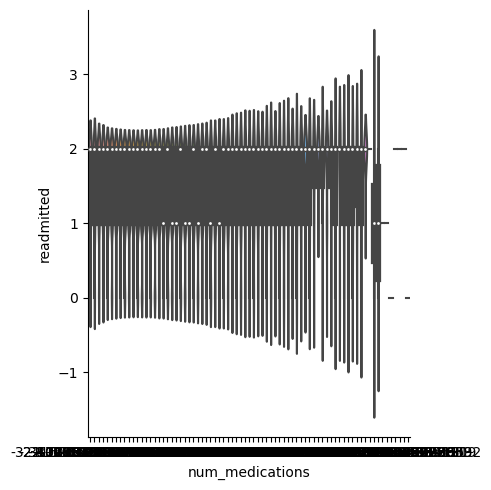

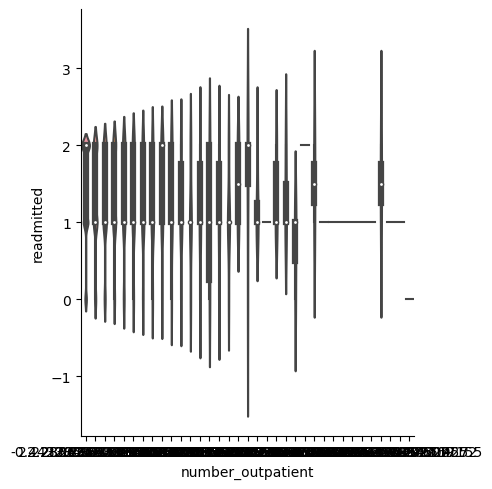

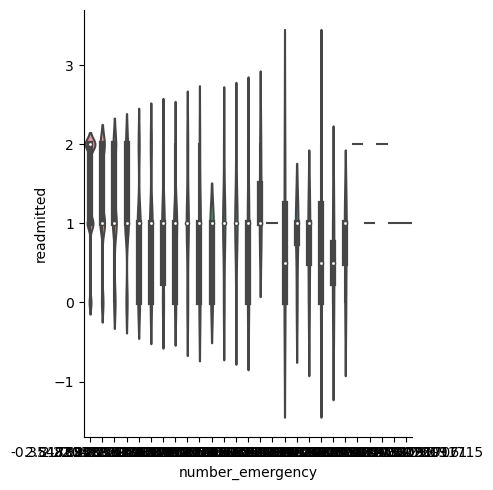

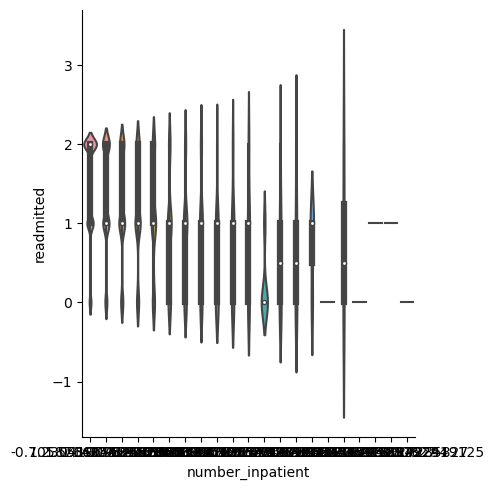

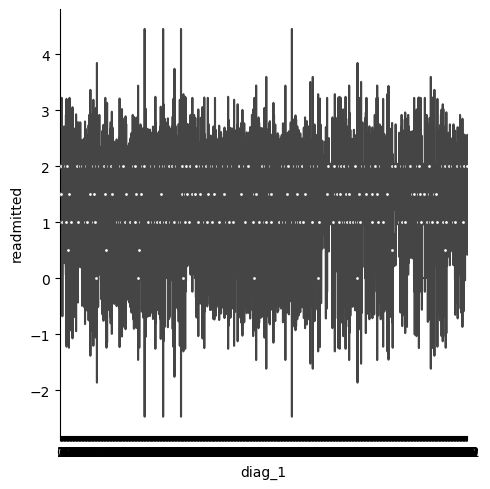

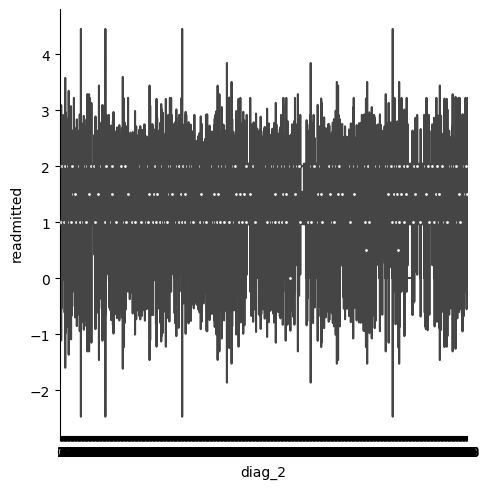

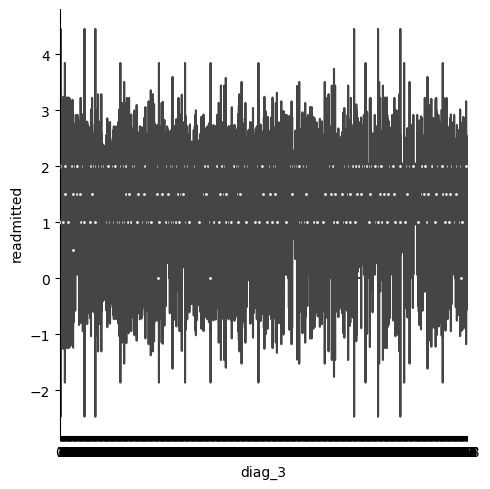

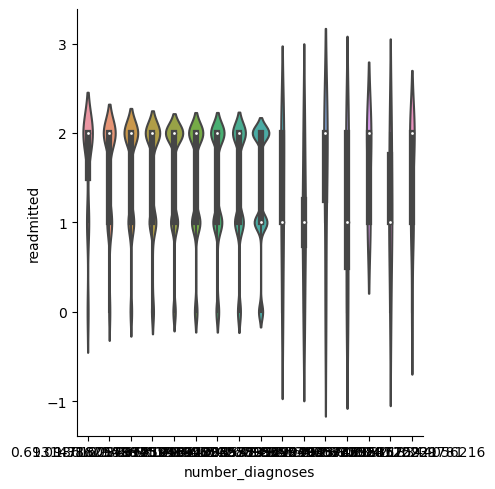

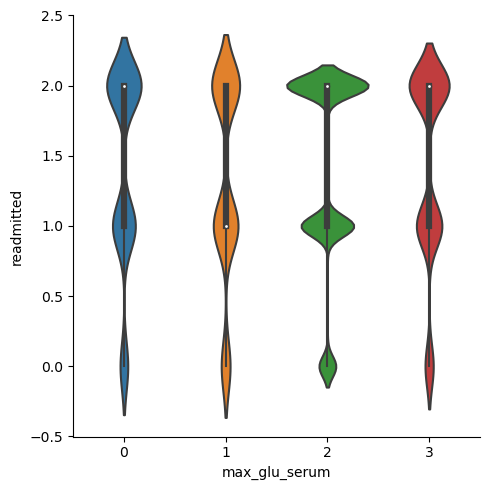

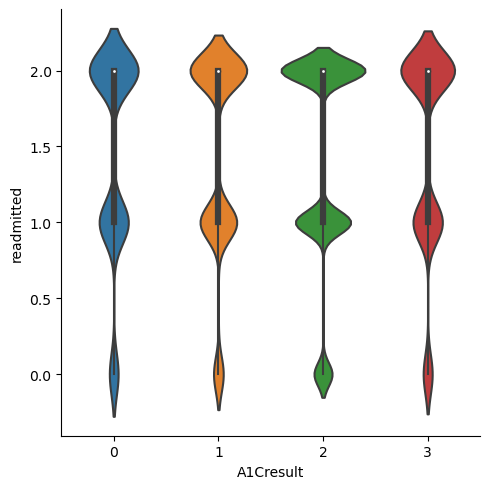

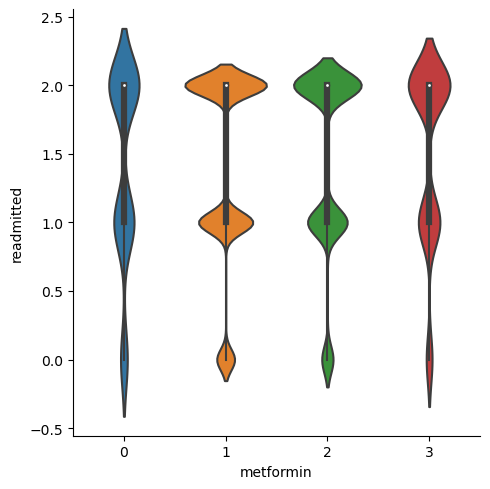

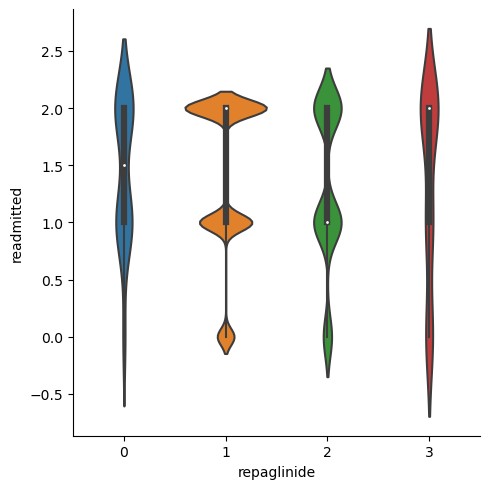

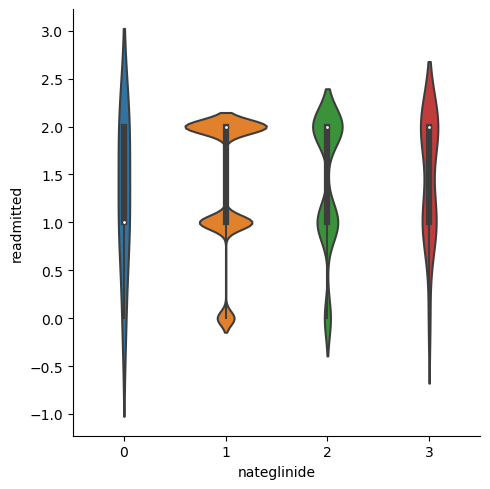

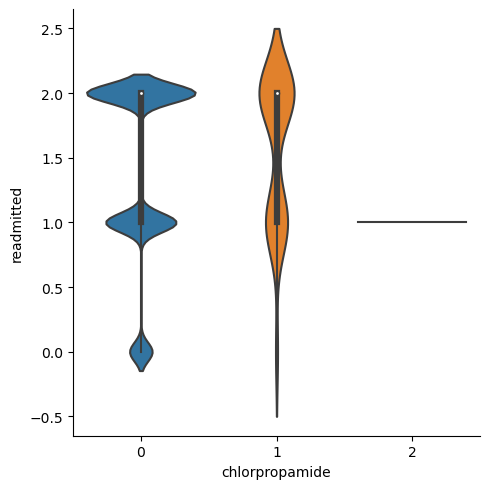

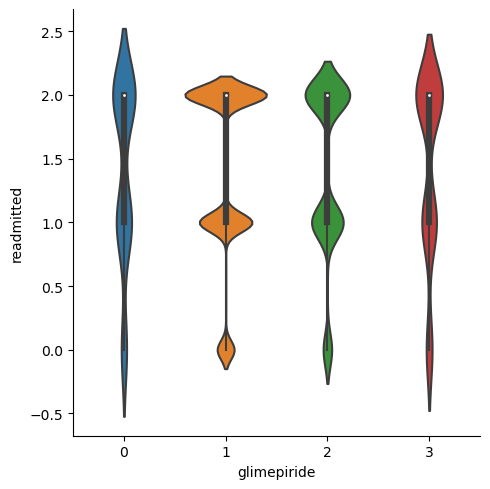

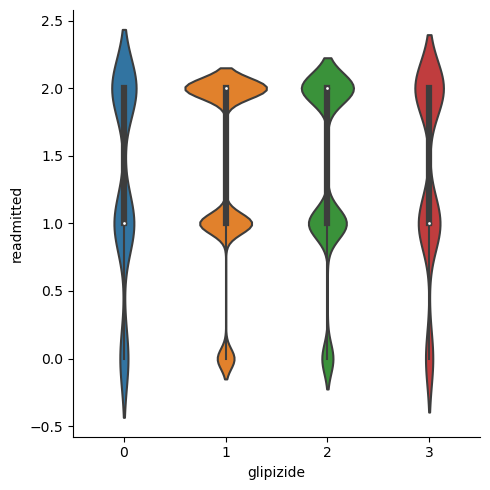

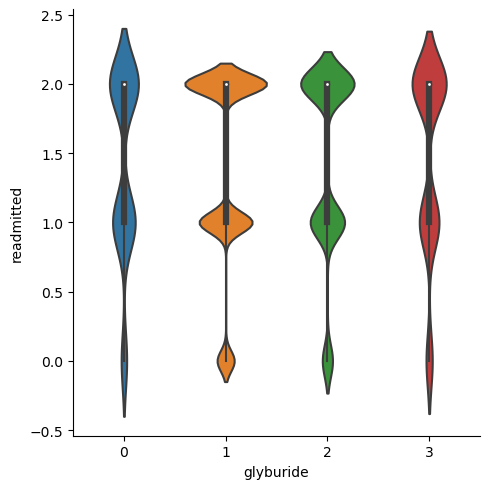

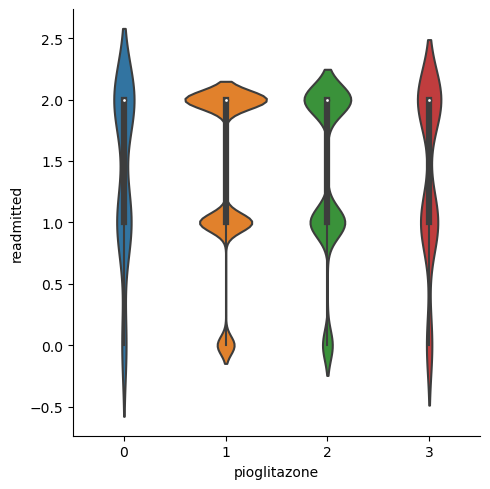

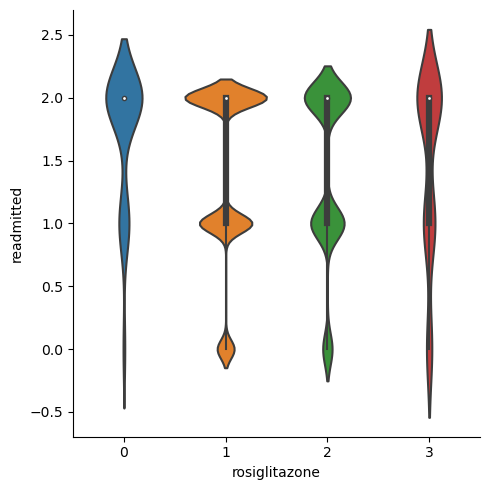

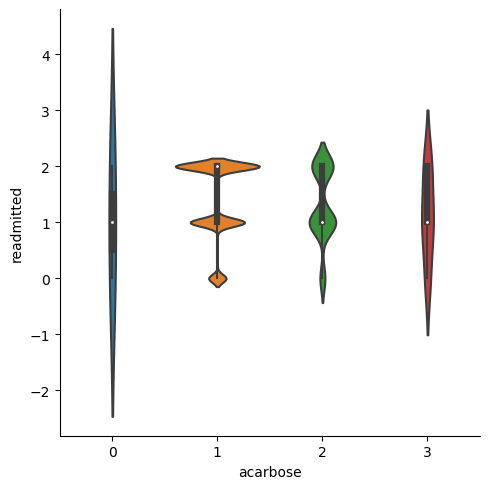

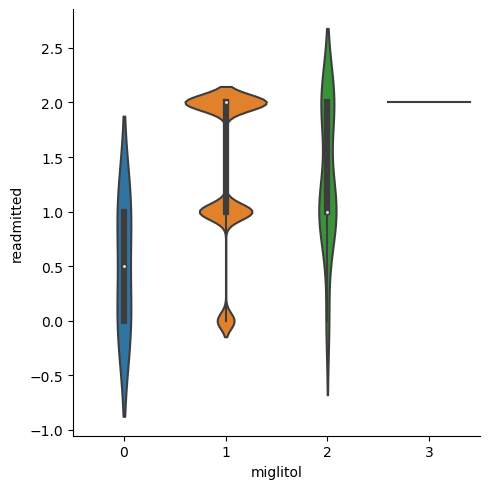

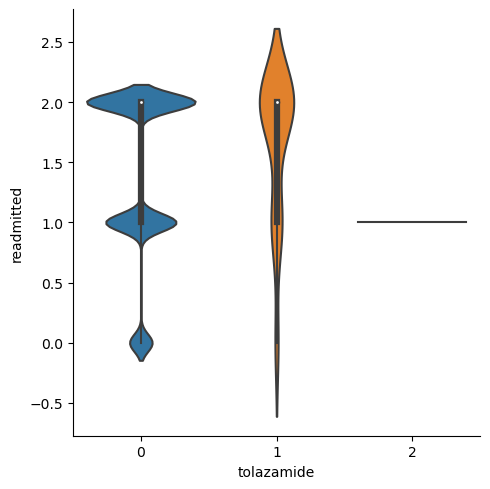

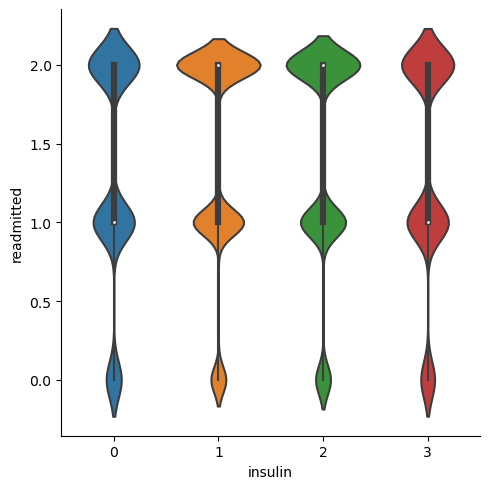

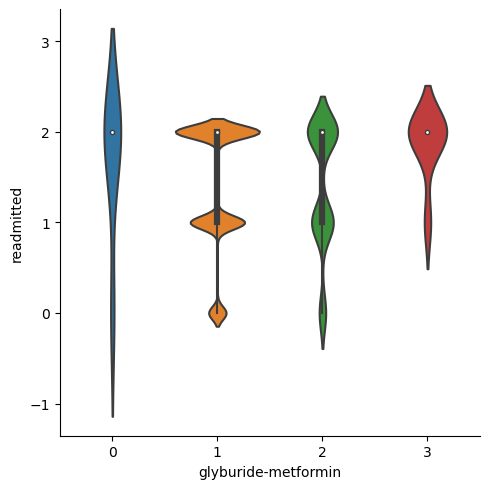

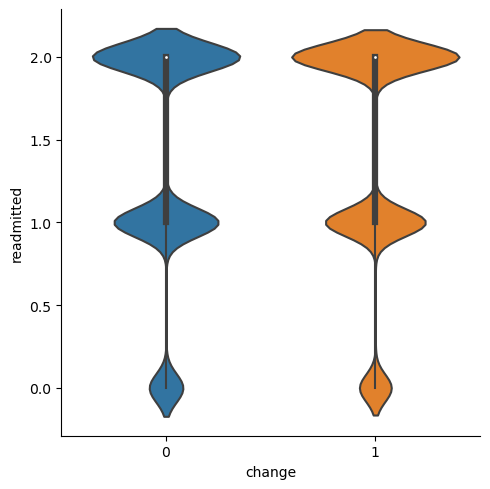

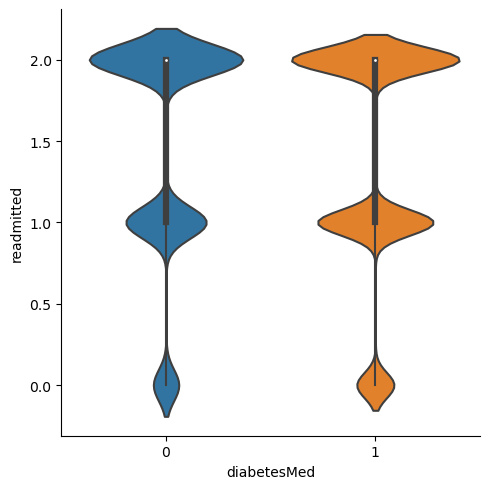

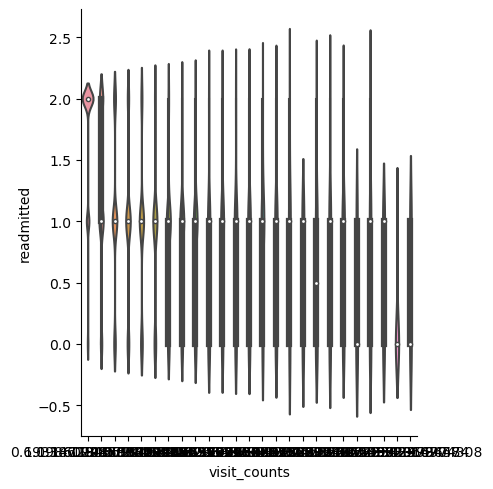

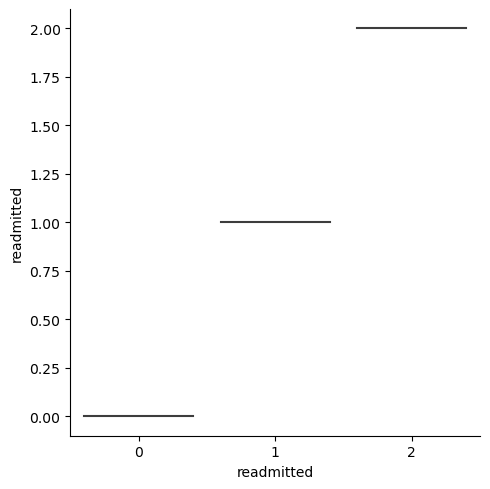

In [88]:
for i in all_data.columns :
    sns.catplot(data=all_data, x=i, y="readmitted", kind="violin")
    plt.show()

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [89]:
from sklearn.model_selection import train_test_split

train_df,val_df= train_test_split(all_data, test_size=0.05, random_state=7,stratify=lable) # Try adding `stratify` here

x_train = train_df.drop(columns='readmitted')
y_train = train_df['readmitted']

x_val = val_df.drop(columns='readmitted')
y_val = val_df['readmitted']


In [90]:
y_train.value_counts()

2    36484
1    23637
0     7552
Name: readmitted, dtype: int64

In [91]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 2.9869791666666665, 1: 0.9543371268209445, 2: 0.6182892957643533}

In [92]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# print('Original dataset shape {}'.format(Counter(lable)))
# smt = SMOTE(random_state=20)
# train_input_new, train_output_new = smt.fit_resample(df_imputed, lable)
# print('New dataset shape {}'.format(Counter(train_output_new)))
# train_input_new = pd.DataFrame(train_input_new, columns = list(df_imputed.columns))
# X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [93]:
# from sklearn.ensemble import RandomForestClassifier
# forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
# forrest.fit(X_train, Y_train)
# print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))


In [94]:
len(x_train), len(x_val), len(y_train), len(y_val)

(67673, 3562, 67673, 3562)

In [95]:
x_train.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
38880     2       0    7          -0.899730                 -0.800717   
42986     2       1    8           1.698366                 -0.800717   
57389     2       1    7          -0.899730                 -0.800717   
64489     2       1    8           0.549173                  0.761561   
66522     0       0    5           1.125337                 -0.800717   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
38880             0.474524         -0.826602           2                 12   
42986             0.474524          0.484407           5                  3   
57389             0.474524         -0.272532           0                 12   
64489             0.474524          0.147460           7                  8   
66522            -1.379591         -1.632304           6                  9   

       num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  \
38880           -0.058015  ...             1              1         1   
42986           -0.108952  ...             1              1         1   
57389           -1.580764  ...             1              1         1   
64489           -2.133407  ...             1              1         1   
66522            0.247783  ...             1              1         1   

       miglitol  tolazamide  insulin  glyburide-metformin  change  \
38880         1           0        2                    1       0   
42986         1           0        1                    1       0   
57389         1           0        1                    1       1   
64489         1           0        2                    1       1   
66522         1           0        2                    1       0   

       diabetesMed  visit_counts  
38880            1      0.693147  
42986            1      0.693147  
57389            0      0.693147  
64489            1      1.386294  
66522            1      0.693147  

[5 rows x 38 columns]

In [96]:
y_train[:1]

38880    1
Name: readmitted, dtype: int64

In [97]:
x_train[:1]

race  gender  age  admission_type_id  discharge_disposition_id  \
38880     2       0    7           -0.89973                 -0.800717   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
38880             0.474524         -0.826602           2                 12   

       num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  \
38880           -0.058015  ...             1              1         1   

       miglitol  tolazamide  insulin  glyburide-metformin  change  \
38880         1           0        2                    1       0   

       diabetesMed  visit_counts  
38880            1      0.693147  

[1 rows x 38 columns]

In [98]:
x_train.tail()

race  gender  age  admission_type_id  discharge_disposition_id  \
22105     2       1    7           1.125337                  1.322169   
57661     2       1    7          -0.899730                 -0.800717   
29726     2       1    7           1.125337                 -0.800717   
5279      2       0    7           0.549173                 -0.800717   
21395     0       1    6           1.125337                 -0.800717   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
22105            -1.379591         -0.826602           7                 57   
57661             0.474524         -0.826602           7                 32   
29726            -1.379591          0.147460          14                 26   
5279             -1.379591          0.484407           7                 23   
21395            -1.379591          0.484407           0                 66   

       num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  \
22105           -0.668602  ...             1              1         1   
57661           -0.210798  ...             1              1         1   
29726            0.553861  ...             1              1         1   
5279             0.196796  ...             1              1         1   
21395           -0.465241  ...             1              1         1   

       miglitol  tolazamide  insulin  glyburide-metformin  change  \
22105         1           0        2                    1       0   
57661         1           0        1                    1       1   
29726         1           0        3                    1       0   
5279          1           0        2                    1       1   
21395         1           0        3                    1       0   

       diabetesMed  visit_counts  
22105            1      0.693147  
57661            1      1.098612  
29726            1      0.693147  
5279             1      0.693147  
21395            1      1.386294  

[5 rows x 38 columns]

In [99]:
y_train.tail()

22105    2
57661    2
29726    1
5279     2
21395    2
Name: readmitted, dtype: int64

As pointed out eariler, I'll use 3 numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=15, random_state=7,n_jobs=-1,n_estimators=30)

# Train the classifier
classifier = classifier.fit(x_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [101]:
print("The accuracy of the classifier on the traing set is ", (classifier.score(x_train, y_train)))
print("The accuracy of the classifier on the validation set is ", (classifier.score(x_val, y_val)))

The accuracy of the classifier on the traing set is  0.7878031120239978
The accuracy of the classifier on the validation set is  0.7167321729365524


## Feature impportance

In [102]:
x_train.shape

(67673, 38)

In [103]:
def rf_feature_importance(m,df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feature_importance(classifier, x_train); fi[:15]

cols       imp
37              visit_counts  0.430202
14          number_inpatient  0.088110
9         num_lab_procedures  0.037006
15                    diag_1  0.036936
17                    diag_3  0.034621
16                    diag_2  0.034444
4   discharge_disposition_id  0.032263
11           num_medications  0.032097
8          medical_specialty  0.029407
6           time_in_hospital  0.022491
7                 payer_code  0.021636
18          number_diagnoses  0.021269
2                        age  0.020848
3          admission_type_id  0.018325
12         number_outpatient  0.016012

In [104]:
sel=fi[:15]['cols'].to_list()
sel

['visit_counts',
 'number_inpatient',
 'num_lab_procedures',
 'diag_1',
 'diag_3',
 'diag_2',
 'discharge_disposition_id',
 'num_medications',
 'medical_specialty',
 'time_in_hospital',
 'payer_code',
 'number_diagnoses',
 'age',
 'admission_type_id',
 'number_outpatient']

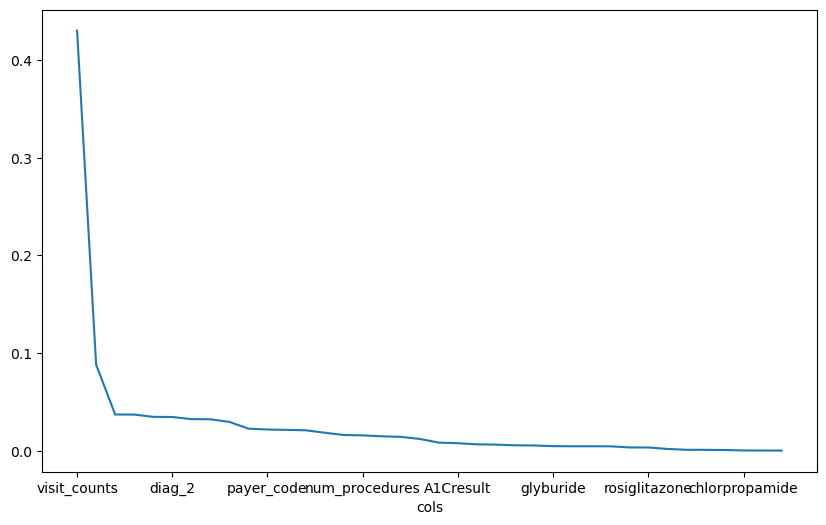

In [105]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

Well. This model is as good as a model that always predicts "NO". Can you verify that? 

In [106]:
x_t=x_train[sel]
v_t=x_val[sel]
# X_train, X_dev, Y_train, Y_dev 

In [107]:
# X_train[X_train.duplicated()]

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,gamma=2.01,reg_lambda=1,reg_alpha=2,n_estimators=81)
xgb.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=81,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=2, ...)

In [109]:
print("The accuracy of the classifier on the validation set is ", (xgb.score(x_val, y_val)))

The accuracy of the classifier on the validation set is  0.727400336889388


In [110]:
featuers.select_dtypes(include="object").columns

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed'],
      dtype='object')

In [111]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_jobs=-1,reg_lambda=1,reg_alpha=2,n_estimators=83,max_depth=6,
                         num_iterations=100,max_bin=430,objective='multiclass',importance_type='split'
                         ,num_class=3,is_unbalance=True)
clf.fit(x_train, y_train)

LGBMClassifier(is_unbalance=True, max_bin=430, max_depth=6, n_estimators=83,
               num_class=3, num_iterations=100, objective='multiclass',
               reg_alpha=2, reg_lambda=1)

In [112]:
print("The accuracy of the classifier on the validation set is ", (clf.score(x_val, y_val)))

The accuracy of the classifier on the validation set is  0.7324536777091522


In [113]:
y_pred_train = clf.predict(x_val)
print("The accuracy of the classifier on the validation set is ", (clf.score(x_train, y_train)))

The accuracy of the classifier on the validation set is  0.736999985223058


In [114]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMClassifier

# lgbm = LGBMClassifier()

# # Define the hyperparameter grid to search over
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 4, 6],
#     'min_child_samples': [10, 20, 30],
#     'objective':['multiclass'],
#     'importance_type':['split']
# }

In [115]:
# grid_search = GridSearchCV(
#     estimator=lgbm,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the grid search to the data
# grid_search.fit(x_train, y_train)

# # Print the best hyperparameters and the corresponding accuracy


In [116]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

In [117]:
# best_estimator = grid_search.best_estimator_

In [118]:
# print("The accuracy of the classifier on the validation set is ", (best_estimator.score(x_val, y_val)))

In [119]:
from sklearn.metrics import classification_report ,f1_score
y_pred = clf.predict(x_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.05      0.09       398
           1       0.66      0.67      0.67      1244
           2       0.78      0.91      0.84      1920

    accuracy                           0.73      3562
   macro avg       0.68      0.55      0.53      3562
weighted avg       0.72      0.73      0.69      3562



In [120]:
classes =[]
labeles=np.unique(lable)
for v in labeles:
    classes.append('Class '+ str(v))
classes

['Class 0', 'Class 1', 'Class 2']

In [121]:
from sklearn.metrics import accuracy_score , recall_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_test_pred = clf.predict(x_val)
pred_accuracy_score = accuracy_score(y_val, y_test_pred)
pred_recall_score = recall_score(y_val, y_test_pred, average='macro')
print('Prediction accuracy', pred_accuracy_score,' recall ', pred_recall_score)

cnf_matrix = confusion_matrix(y_val, y_test_pred, labels=[0,1,2])
cnf_matrix

Prediction accuracy 0.7324536777091522  recall  0.5451936127583253


array([[  20,  273,  105],
       [   8,  837,  399],
       [   5,  163, 1752]])

In [122]:
class LGBMClassifier_GainFE(lgb.LGBMClassifier):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [123]:
clf2 = LGBMClassifier_GainFE(n_jobs=-1,reg_lambda=1,reg_alpha=2,n_estimators=83,max_depth=6,
                         num_iterations=100,max_bin=430)

In [124]:
# clf2.fit(x_train, y_train, **fit_params)

In [125]:
# feat_imp = pd.Series(clf2.feature_importances_, index=x_train.columns)
# feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [126]:
# from sklearn.metrics import classification_report
# y_pred = clf.predict(x_val)

# print(classification_report(y_val, y_pred))

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [127]:
f_test=test_df.copy()

Note that the test set has the same features and doesn't have the `readmitted` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `readmitted` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [128]:
to_drop_features = ['encounter_id', 'patient_nbr','examide','citoglipton','acetohexamide','weight','tolbutamide','troglitazone','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','tolbutamide']
test_df.drop(columns=to_drop_features,inplace=True)


In [129]:
test_df.replace('?',np.NaN,inplace=True)

In [130]:
test_df.head()

race  gender      age  admission_type_id  \
0  AfricanAmerican  Female  [60-70)                  2   
1        Caucasian    Male  [80-90)                  2   
2              NaN  Female  [20-30)                  2   
3  AfricanAmerican  Female  [60-70)                  1   
4        Caucasian    Male  [60-70)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        22                    1                 4         MC   
1                        13                    1                 3         MC   
2                        18                    4                 4        NaN   
3                        22                    7                 7         MD   
4                        22                    1                 7        NaN   

        medical_specialty  num_lab_procedures  ...  pioglitazone  \
0        InternalMedicine                  46  ...            No   
1                     NaN                  42  ...        Steady   
2  Family/GeneralPractice                  71  ...            No   
3                     NaN                  79  ...            No   
4        Surgery-Vascular                  33  ...            No   

   rosiglitazone  acarbose  miglitol  tolazamide insulin glyburide-metformin  \
0             No        No        No          No  Steady                  No   
1             No        No        No          No  Steady                  No   
2             No        No        No          No      No                  No   
3             No        No        No          No  Steady                  No   
4             No        No        No          No      No                  No   

  change  diabetesMed visit_counts  
0     No          Yes            3  
1     Ch          Yes            1  
2     No           No            1  
3     No          Yes            1  
4     No          Yes            2  

[5 rows x 38 columns]

In [131]:
test=test_df.copy() 

In [132]:
test["gender"].value_counts()

Female             16410
Male               14118
Unknown/Invalid        2
Name: gender, dtype: int64

In [133]:
test['gender'] = test['gender'].replace('Unknown/Invalid','Female')


In [134]:
test["gender"].value_counts()

Female    16412
Male      14118
Name: gender, dtype: int64

In [135]:
test['medical_specialty'].replace('Hematology','Hematology/Oncology',inplace=True)
len(test['medical_specialty'].unique())

64

In [136]:
test.race.value_counts()

Caucasian          22830
AfricanAmerican     5765
Hispanic             610
Other                452
Asian                192
Name: race, dtype: int64

In [137]:
feauters_encoder

LabelEncoder()

In [138]:
ecoder_list

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [139]:
categorical_columns_enc[13]

'chlorpropamide'

In [140]:
mid=ecoder_list[5].classes_.tolist()
mid2=ecoder_list[6].classes_.tolist()
mid3=ecoder_list[7].classes_.tolist()

In [141]:
test2=test.copy() 

In [142]:
test=test2.copy() 

In [143]:
test['medical_specialty'] = test['medical_specialty'].replace('Proctology','InternalMedicine')
test['medical_specialty'] = test['medical_specialty'].replace('Psychiatry-Addictive','InternalMedicine')
# test['diag_1'] = test['diag_1'].replace('240','428')
# test['diag_1'] = test['diag_1'].replace('477','428')
# test['diag_1'] = test['diag_1'].replace('314','428')
# test['diag_1'] = test['diag_1'].replace('389','428')
# test['diag_1'] = test['diag_1'].replace('897','428')
# test['diag_1'] = test['diag_1'].replace('207','428')
# test['diag_1'] = test['diag_1'].replace('V07','428')
# test['diag_1'] = test['diag_1'].replace('363','428')
# test['diag_1'] = test['diag_1'].replace('870','428')
# test['diag_1'] = test['diag_1'].replace('602','428')
test['chlorpropamide'] = test['chlorpropamide'].replace('Down','No')
for l in test['diag_1']:
    if l not in mid:
        test['diag_1'] = test['diag_1'].replace(l,'428')

for l2 in test['diag_2']:
    if l2 not in mid2:
        test['diag_2'] = test['diag_2'].replace(l2,'428')

for l3 in test['diag_3']:
    if l3 not in mid3:
        test['diag_3'] = test['diag_3'].replace(l3,'250')

test[(test['chlorpropamide'] == "Down")]

Empty DataFrame
Columns: [race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone, acarbose, miglitol, tolazamide, insulin, glyburide-metformin, change, diabetesMed, visit_counts]
Index: []

[0 rows x 38 columns]

In [144]:
categorical_columns_enc

['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'change',
 'diabetesMed']

In [145]:
test.miglitol.value_counts()

No        30520
Steady        8
Down          1
Up            1
Name: miglitol, dtype: int64

In [146]:
test[test.miglitol=='Down']

race gender      age  admission_type_id  discharge_disposition_id  \
3204  Caucasian   Male  [80-90)                  1                         6   

      admission_source_id  time_in_hospital payer_code medical_specialty  \
3204                    7                 3         MC               NaN   

      num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  \
3204                  11  ...            No             No        No   

      miglitol  tolazamide insulin glyburide-metformin change  diabetesMed  \
3204      Down          No      No                  No     Ch          Yes   

     visit_counts  
3204            7  

[1 rows x 38 columns]

In [147]:
test['medical_specialty'] = test['medical_specialty'].replace('Pediatrics-AllergyandImmunology','InternalMedicine')
test['medical_specialty'] = test['medical_specialty'].replace('Resident','InternalMedicine')
test['miglitol'] = test['miglitol'].replace('Down','No')


In [148]:
i=0
for col in categorical_columns_enc:
    print(i)
    test[col][test[col].notnull()]= ecoder_list[i].transform(test[col][test[col].notnull()])
    i+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [149]:
test.head()

race gender age  admission_type_id  discharge_disposition_id  \
0    0      0   6                  2                        22   
1    2      1   8                  2                        13   
2  NaN      0   2                  2                        18   
3    0      0   6                  1                        22   
4    2      1   6                  2                        22   

   admission_source_id  time_in_hospital payer_code medical_specialty  \
0                    1                 4          7                17   
1                    1                 3          7               NaN   
2                    4                 4        NaN                11   
3                    7                 7          8               NaN   
4                    1                 7        NaN                66   

   num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  miglitol  \
0                  46  ...             1              1         1         1   
1                  42  ...             2              1         1         1   
2                  71  ...             1              1         1         1   
3                  79  ...             1              1         1         1   
4                  33  ...             1              1         1         1   

   tolazamide insulin glyburide-metformin change  diabetesMed visit_counts  
0           0       2                   1      1            1            3  
1           0       2                   1      0            1            1  
2           0       1                   1      1            0            1  
3           0       2                   1      1            1            1  
4           0       1                   1      1            1            2  

[5 rows x 38 columns]

In [150]:
# test['service'] = test['number_outpatient'] + test['number_emergency'] + test['number_inpatient']

In [151]:
# test.drop(columns=['number_outpatient','number_emergency','number_inpatient'],inplace=True)

In [152]:
#df_imputed.payer_code.value_counts().sort_index()
test_imputed = pd.DataFrame(imputer.transform(test), columns=test.columns)


In [153]:
for i in test_imputed.columns : 
    test_imputed[i] = round(test_imputed[i]).astype('int')
    
test_imputed.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
0     0       0    6                  2                        22   
1     2       1    8                  2                        13   
2     2       0    2                  2                        18   
3     0       0    6                  1                        22   
4     2       1    6                  2                        22   

   admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0                    1                 4           7                 17   
1                    1                 3           7                 22   
2                    4                 4           6                 11   
3                    7                 7           8                 22   
4                    1                 7           6                 66   

   num_lab_procedures  ...  pioglitazone  rosiglitazone  acarbose  miglitol  \
0                  46  ...             1              1         1         1   
1                  42  ...             2              1         1         1   
2                  71  ...             1              1         1         1   
3                  79  ...             1              1         1         1   
4                  33  ...             1              1         1         1   

   tolazamide  insulin  glyburide-metformin  change  diabetesMed  visit_counts  
0           0        2                    1       1            1             3  
1           0        2                    1       0            1             1  
2           0        1                    1       1            0             1  
3           0        2                    1       1            1             1  
4           0        1                    1       1            1             2  

[5 rows x 38 columns]

In [154]:
dfpt=test_imputed[['number_diagnoses',
 'visit_counts']]

dfft=test_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications','number_outpatient','number_emergency','number_inpatient']]

In [155]:
from sklearn.preprocessing import PowerTransformer
dt=pt.transform(dfft)
dt=pd.DataFrame(dt,columns=['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications','number_outpatient','number_emergency','number_inpatient'])

In [156]:
from sklearn.preprocessing import FunctionTransformer
dt2=transformer.transform(dfpt)
dt2=pd.DataFrame(dt2,columns=['number_diagnoses',
 'visit_counts'])


In [157]:
test_imputed[['number_diagnoses',
 'visit_counts']]=dt2
test_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications','number_outpatient','number_emergency','number_inpatient']]=dt


In [158]:
# X_test = test_df.drop(columns=to_drop_features[:2])

# # You should update/remove the next line once you change the features used for training
# X_test = X_test[selected_features]

y_test_predicted = clf.predict(test_imputed)
y=label_encoder.inverse_transform(y_test_predicted)
y

array(['<30', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [159]:

f_test['readmitted'] = y

f_test.head()

encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... insulin glyburide-metformin  glipizide-metformin  \
0                 4  ...  Steady                  No                   No   
1                 3  ...  Steady                  No                   No   
2                 4  ...      No                  No                   No   
3                 7  ...  Steady                  No                   No   
4                 7  ...      No                  No                   No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed visit_counts readmitted  
0      No          Yes            3        <30  
1      Ch          Yes            1         NO  
2      No           No            1         NO  
3      No          Yes            1         NO  
4      No          Yes            2        <30  

[5 rows x 51 columns]

Now we're ready to generate the submission file. The submission file needs the columns `encounter_id` and `readmitted` only.

In [160]:
f_test[['encounter_id', 'readmitted']]

encounter_id readmitted
0         109962834        <30
1         240829854         NO
2          44942994         NO
3         302469824         NO
4         172075704        <30
...             ...        ...
30525     160817292        >30
30526     296022602        >30
30527     156232536         NO
30528     407964242         NO
30529     110113794         NO

[30530 rows x 2 columns]

In [161]:
f_test[['encounter_id', 'readmitted']].to_csv('/kaggle/working/subnn', index=False)